## Linguistic Evaluation

### distilgpt2

In [21]:
eval_files = [
    "outputs/test_rd/eval_table_rd.csv",
    #"outputs/base/eval_table_base.csv",
    "outputs/distilgpt2/gen0/eval_table_gen0.csv",
    "outputs/distilgpt2/gen1/eval_table_gen1.csv",
    "outputs/distilgpt2/gen2/eval_table_gen2.csv",
    "outputs/distilgpt2/gen3/eval_table_gen3.csv",
    "outputs/distilgpt2/gen4/eval_table_gen4.csv",
    "outputs/distilgpt2/gen5/eval_table_gen5.csv",
    "outputs/distilgpt2/gen6/eval_table_gen6.csv",
    "outputs/distilgpt2/gen7/eval_table_gen7.csv"
]

columns = ["Distinct-2", "Distinct-3", "Self-BLEU", "OV-TTR", "MS-TTR", "S-DIV-AV", "S-DIV-C", "SYN-DIV"]

#process_and_plot_csv_data_with_base(eval_files, columns, "linguistic", "evaluation" )
process_and_plot_csv_data_with_legend(eval_files, columns, "linguistic", "evaluation" )

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/test_rd/eval_table_rd.csv'

      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
RD      0.857847    0.958945   0.952630  0.526975  0.774601  0.802330   
base    0.198648    0.221848   0.247982  0.155126  0.410511  0.307847   
GEN0    0.214225    0.249755   0.279120  0.199715  0.384645  0.350182   
GEN1    0.082420    0.077315   0.204846  0.154817  0.339579  0.145568   
GEN2    0.090253    0.091960   0.287177  0.132601  0.356066  0.176245   
GEN3    0.057071    0.057817   0.446384  0.276936  0.454114  0.165485   
GEN4    0.056121    0.058743   0.636110  0.194446  0.379936  0.418668   
GEN5    0.106241    0.107299   0.535485  0.173784  0.392925  0.390185   
GEN6    0.138772    0.140523   0.404635  0.164240  0.399642  0.299001   

       S-DIV-C   SYN-DIV  
RD    0.527642  0.780589  
base  0.151607  0.294443  
GEN0  0.182166  0.324921  
GEN1  0.061230  0.121491  
GEN2  0.068537  0.126372  
GEN3  0.051464  0.100037  
GEN4  0.095551  0.194490  
GEN5  0.112703  0.237562  
GEN6  0.101416  0.194686  

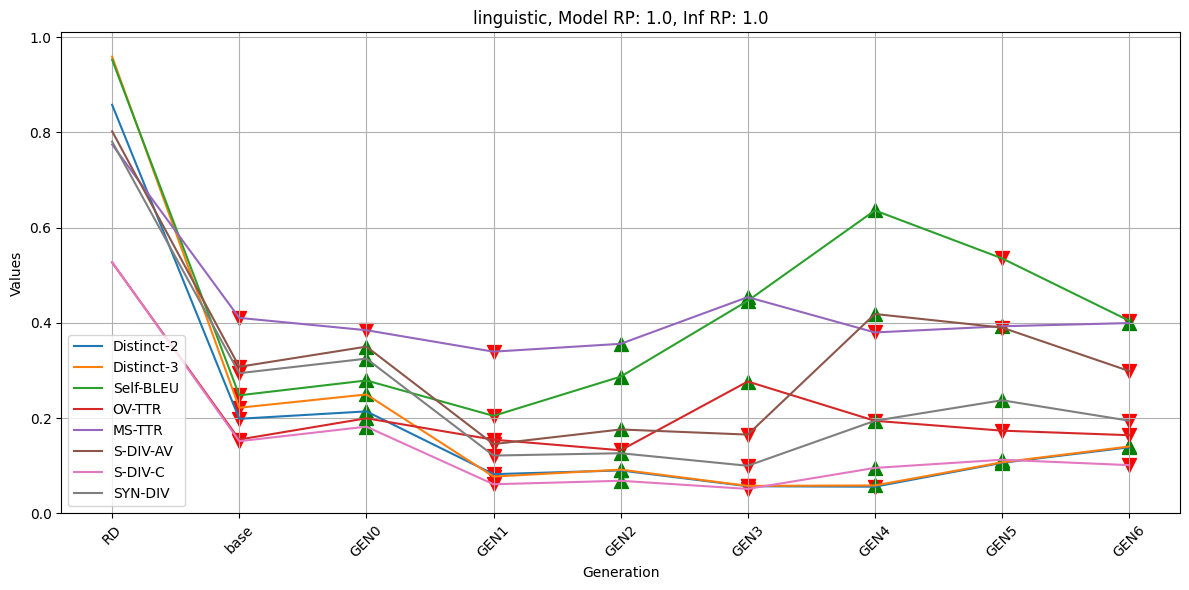

      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
RD      0.857847    0.958945   0.952630  0.526975  0.774601  0.802330   
base    0.543964    0.599569   0.559459  0.389368  0.648793  0.625971   
GEN0    0.749251    0.830058   0.787596  0.489398  0.699759  0.726459   
GEN1    0.140338    0.155797   0.237058  0.157955  0.384337  0.302339   
GEN2    0.088386    0.093591   0.253831  0.129213  0.358159  0.209753   
GEN3    0.077242    0.079492   0.254396  0.179930  0.376002  0.158140   
GEN4    0.082842    0.084774   0.463536  0.144082  0.326421  0.367628   
GEN5    0.105686    0.107420   0.486710  0.143879  0.349896  0.404990   
GEN6    0.094837    0.097498   0.532561  0.144701  0.401647  0.407139   

       S-DIV-C   SYN-DIV  
RD    0.527642  0.780589  
base  0.365771  0.616454  
GEN0  0.471105  0.700807  
GEN1  0.152870  0.268519  
GEN2  0.094075  0.169213  
GEN3  0.064968  0.117980  
GEN4  0.110665  0.234973  
GEN5  0.127751  0.260546  
GEN6  0.121926  0.244140  

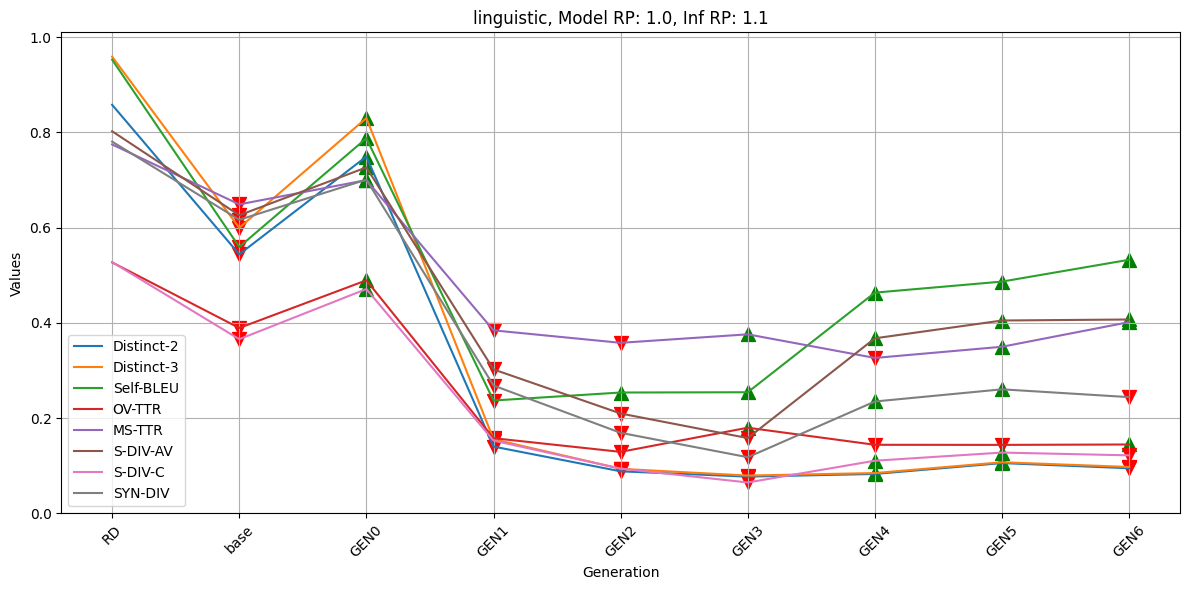

      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
RD      0.857847    0.958945   0.952630  0.526975  0.774601  0.802330   
base    0.198648    0.221848   0.247982  0.155126  0.410511  0.307847   
GEN0    0.214225    0.249755   0.279120  0.199715  0.384645  0.350182   
GEN1    0.177748    0.194252   0.241021  0.190368  0.389738  0.302494   
GEN2    0.137715    0.147506   0.491377  0.331172  0.511299  0.336263   
GEN3    0.312659    0.328409   0.596216  0.415973  0.579968  0.487986   
GEN4    0.435798    0.451001   0.711176  0.515500  0.667026  0.631402   
GEN5    0.519205    0.535141   0.802677  0.579009  0.697578  0.724276   
GEN6    0.622986    0.640098   0.853481  0.532383  0.672054  0.776638   

       S-DIV-C   SYN-DIV  
RD    0.527642  0.780589  
base  0.151607  0.294443  
GEN0  0.182166  0.324921  
GEN1  0.152560  0.258466  
GEN2  0.126321  0.216983  
GEN3  0.197387  0.319949  
GEN4  0.276893  0.436717  
GEN5  0.328611  0.507472  
GEN6  0.397822  0.594918  

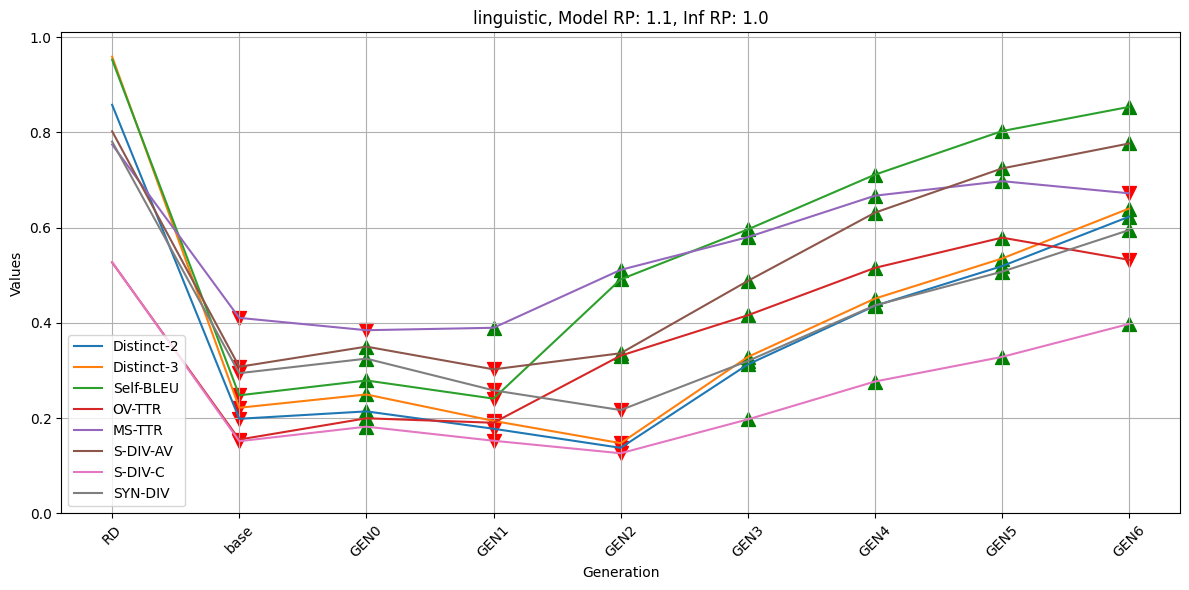

      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
RD      0.857847    0.958945   0.952630  0.526975  0.774601  0.802330   
base    0.543964    0.599569   0.559459  0.389368  0.648793  0.625971   
GEN0    0.749251    0.830058   0.787596  0.489398  0.699759  0.726459   
GEN1    0.599506    0.646478   0.683170  0.438999  0.635503  0.662195   
GEN2    0.436251    0.459409   0.697603  0.494795  0.651739  0.610165   
GEN3    0.561302    0.580043   0.732751  0.507444  0.656970  0.685045   
GEN4    0.677029    0.687314   0.754250  0.532575  0.712160  0.742914   
GEN5    0.645212    0.652340   0.811438  0.578138  0.751562  0.762659   
GEN6    0.721579    0.730549   0.864220  0.621705  0.767526  0.804234   

       S-DIV-C   SYN-DIV  
RD    0.527642  0.780589  
base  0.365771  0.616454  
GEN0  0.471105  0.700807  
GEN1  0.396208  0.596173  
GEN2  0.298146  0.461146  
GEN3  0.365230  0.544518  
GEN4  0.426268  0.636325  
GEN5  0.429039  0.641095  
GEN6  0.457697  0.684346  

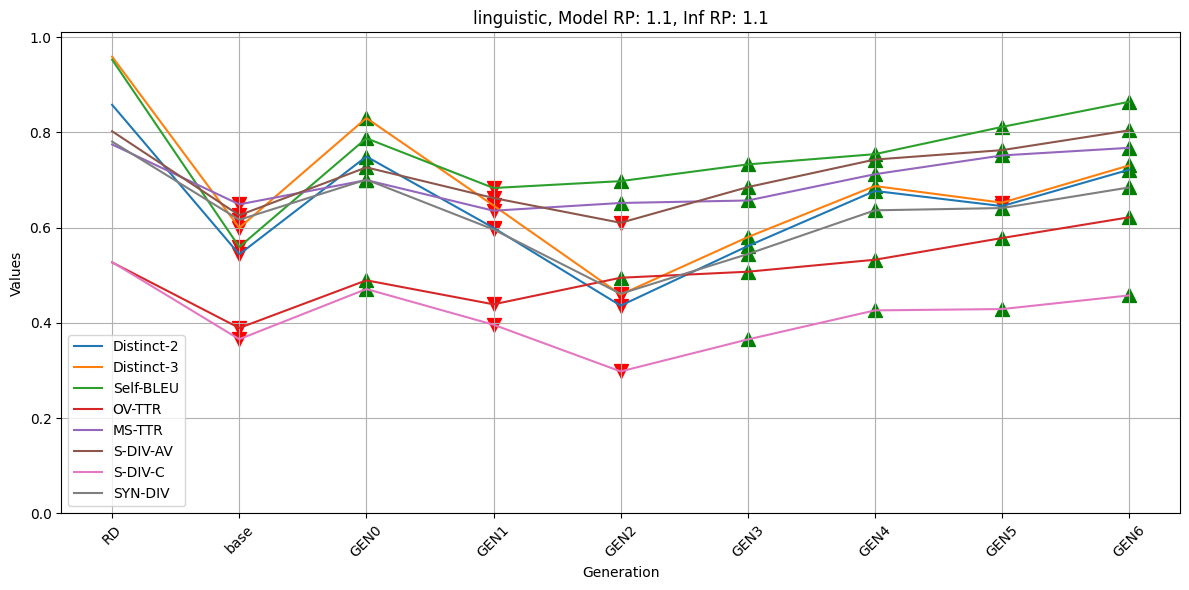

In [1]:
from tools.plotting_tools import process_and_plot_csv_data_with_legend

ling_eval_10_10 = [
    "outputs/test_rd/lg_eval_table_rd.csv",
    "outputs/opt125m/base/lg_eval_table_base_rp1.0.csv",
    "outputs/opt125m/gen0/lg_eval_table_gen0_rp1.0.csv",
    "outputs/opt125m/gen1_1.0/lg_eval_table_gen1_rp1.0.csv",
    "outputs/opt125m/gen2_1.0/lg_eval_table_gen2_rp1.0.csv",
    "outputs/opt125m/gen3_1.0/lg_eval_table_gen3_rp1.0.csv",
    "outputs/opt125m/gen4_1.0/lg_eval_table_gen4_rp1.0.csv",
    "outputs/opt125m/gen5_1.0/lg_eval_table_gen5_rp1.0.csv",
    "outputs/opt125m/gen6_1.0/lg_eval_table_gen6_rp1.0.csv",
    #"outputs/opt125m/gen7/eval_table_gen7.csv"
]

ling_eval_10_11 = [
    "outputs/test_rd/lg_eval_table_rd.csv",
    "outputs/opt125m/base/lg_eval_table_base_rp1.1.csv",
    "outputs/opt125m/gen0/lg_eval_table_gen0_rp1.1.csv",
    "outputs/opt125m/gen1_1.0/lg_eval_table_gen1_rp1.1.csv",
    "outputs/opt125m/gen2_1.0/lg_eval_table_gen2_rp1.1.csv",
    "outputs/opt125m/gen3_1.0/lg_eval_table_gen3_rp1.1.csv",
    "outputs/opt125m/gen4_1.0/lg_eval_table_gen4_rp1.1.csv",
    "outputs/opt125m/gen5_1.0/lg_eval_table_gen5_rp1.1.csv",
    "outputs/opt125m/gen6_1.0/lg_eval_table_gen6_rp1.1.csv",
    #"outputs/opt125m/gen7/eval_table_gen7.csv"
]

ling_eval_11_10 = [
    "outputs/test_rd/lg_eval_table_rd.csv",
    "outputs/opt125m/base/lg_eval_table_base_rp1.0.csv",
    "outputs/opt125m/gen0/lg_eval_table_gen0_rp1.0.csv",
    "outputs/opt125m/gen1_1.1/lg_eval_table_gen1_rp1.0.csv",
    "outputs/opt125m/gen2_1.1/lg_eval_table_gen2_rp1.0.csv",
    "outputs/opt125m/gen3_1.1/lg_eval_table_gen3_rp1.0.csv",
    "outputs/opt125m/gen4_1.1/lg_eval_table_gen4_rp1.0.csv",
    "outputs/opt125m/gen5_1.1/lg_eval_table_gen5_rp1.0.csv",
    "outputs/opt125m/gen6_1.1/lg_eval_table_gen6_rp1.0.csv",
    #"outputs/opt125m/gen7/eval_table_gen7.csv"
]

ling_eval_11_11 = [
    "outputs/test_rd/lg_eval_table_rd.csv",
    "outputs/opt125m/base/lg_eval_table_base_rp1.1.csv",
    "outputs/opt125m/gen0/lg_eval_table_gen0_rp1.1.csv",
    "outputs/opt125m/gen1_1.1/lg_eval_table_gen1_rp1.1.csv",
    "outputs/opt125m/gen2_1.1/lg_eval_table_gen2_rp1.1.csv",
    "outputs/opt125m/gen3_1.1/lg_eval_table_gen3_rp1.1.csv",
    "outputs/opt125m/gen4_1.1/lg_eval_table_gen4_rp1.1.csv",
    "outputs/opt125m/gen5_1.1/lg_eval_table_gen5_rp1.1.csv",
    "outputs/opt125m/gen6_1.1/lg_eval_table_gen6_rp1.1.csv",
    #"outputs/opt125m/gen7/eval_table_gen7.csv"
]



columns = ["Distinct-2", "Distinct-3", "Self-BLEU", "OV-TTR", "MS-TTR", "S-DIV-AV", "S-DIV-C", "SYN-DIV"]

#process_and_plot_csv_data_with_base(eval_files, columns, "linguistic", "evaluation" )
process_and_plot_csv_data_with_legend(ling_eval_10_10, columns, "linguistic", "evaluation", 1.0, 1.0)
process_and_plot_csv_data_with_legend(ling_eval_10_11, columns, "linguistic", "evaluation", 1.0, 1.1)
process_and_plot_csv_data_with_legend(ling_eval_11_10, columns, "linguistic", "evaluation", 1.1, 1.0)
process_and_plot_csv_data_with_legend(ling_eval_11_11, columns, "linguistic", "evaluation", 1.1, 1.1)

## Creativity/Originality Evaluation

1. MS-Jaccard

This metric measures diversity by calculating the Jaccard similarity between the n-grams of each generated story and every other story in the dataset.  
Using a pseudocount of 0.5 is an interesting choice for your specific use case where the primary objective is to investigate the differences in similarity scores between various generations of synthetic text and a base of human texts. This choice is particularly insightful because it moderates the impact of n-grams that do not overlap between the sets, providing a more stable and "neutral" base score, rather than skewing the results dramatically towards zero. This could help in achieving a more balanced comparison across model generations.
Rationale for Using 0.5 as a Pseudocount

    Balanced Impact: A pseudocount of 0.5 helps in ensuring that missing n-grams don't completely nullify the similarity scores, but rather contribute a moderate base value to the geometric mean calculation. This is beneficial in cases where you expect some level of inherent dissimilarity due to generational changes in model outputs but want to prevent those differences from being exaggerated by zeros.
    Neutral Base Score: By setting the pseudocount to 0.5, the impact of each missing n-gram on the overall score is effectively neutralized, enabling a focus on the n-grams that do exist in both sets. This approach ensures that the similarity score reflects meaningful linguistic features present in both texts rather than being overly penalized for differences.  

2. Feature-based Similarity

We will use a pre-trained model (like BERT) to extract embeddings for the stories and then compute cosine similarities between these embeddings to measure how diverse the stories are in terms of semantic content.  

3. Fluency: This metric assesses the quantity of relevant ideas generated. In text, this can be translated to the number of relevant responses or ideas mentioned.

4. Flexibility: This measures the variety of ideas or categories used. In text, it evaluates how many different themes or subjects are touched upon.

5. Originality: This evaluates the uniqueness of the ideas relative to a typical response. It often requires a larger dataset to determine what counts as "typical."

### **Flexibility**
#### **Assisting Data** : Keywords Categories
First, we create a dictionary that organizes words from the RD test file into thematic categories. We follow a process of topic modeling or clustering. Topic modeling, specifically Latent Dirichlet Allocation (LDA), helps identify latent topics in text by clustering words that commonly appear together.
This method provides a basic categorization of the text into themes without explicit labels. Each topic will be named as topic_0, topic_1, etc., and the associated keywords represent the thematic categories.  
  
We intentionally employ the prompt file for this purpose, believing that this approach establishes a nuanced connection between the flexibility metric and the literary themes intended by the prompts. This connection enhances the metric's relevance, aligning it more closely with how a human would assess creative text.

### **Originality**
#### **Assisting Data** : Frequency Reference Corpus
We create a frequency reference corpus from the RD test source (containing human stories) calculating the frequency of each word. The frequencies will then be normalized to represent the proportion of each word's occurrence compared to the entire corpus.

      Jaccard-Sim-2  Feature-Based-Sim   Fluency  Flexibility  Originality
base       0.398241           0.737555  0.178515     0.384950     0.473637
GEN0       0.419967           0.706172  0.242100     0.441400     0.462506
GEN1       0.399706           0.636233  0.095248     0.259604     0.508765
GEN2       0.392707           0.651413  0.088119     0.257030     0.494738
GEN3       0.395815           0.558555  0.065000     0.170600     0.526348
GEN4       0.394391           0.515073  0.074554     0.170693     0.643707
GEN5       0.392165           0.540852  0.083564     0.197921     0.652778
GEN6       0.388316           0.636762  0.098515     0.248020     0.582654


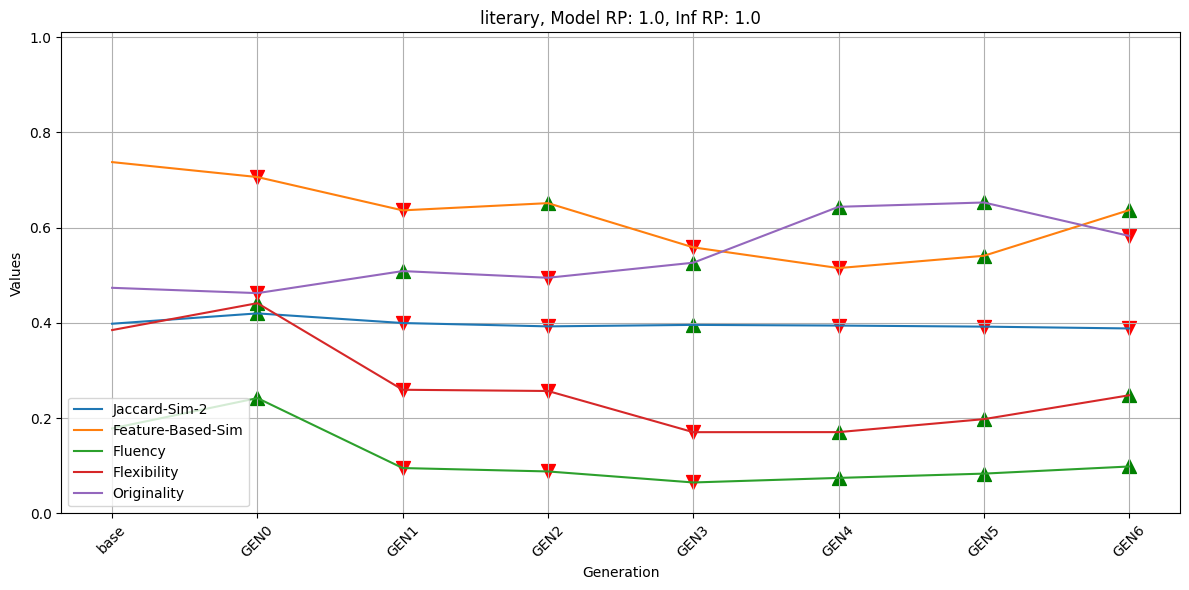

      Jaccard-Sim-2  Feature-Based-Sim   Fluency  Flexibility  Originality
base       0.416519           0.813849  0.653364     0.683364     0.571428
GEN0       0.459777           0.838054  0.985000     0.801176     0.555424
GEN1       0.413175           0.675369  0.212376     0.425545     0.473462
GEN2       0.397464           0.684883  0.114700     0.297000     0.486717
GEN3       0.397801           0.677970  0.077600     0.218500     0.453898
GEN4       0.397716           0.546865  0.072376     0.176634     0.628348
GEN5       0.396047           0.561107  0.094059     0.226238     0.630921
GEN6       0.388504           0.628589  0.109703     0.252970     0.548552


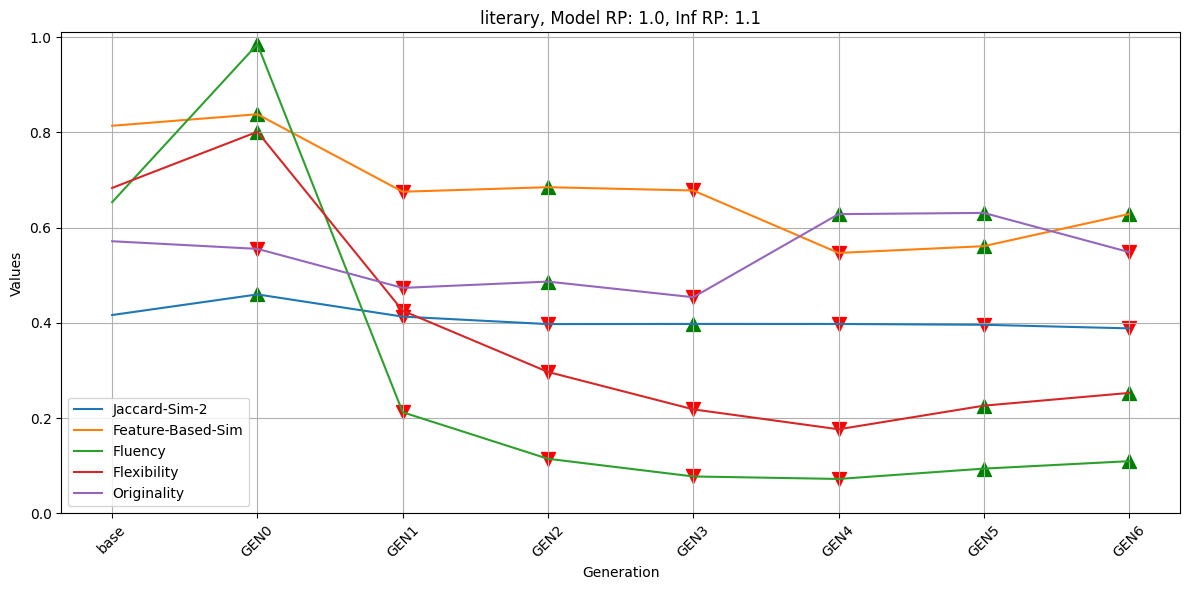

      Jaccard-Sim-2  Feature-Based-Sim   Fluency  Flexibility  Originality
base       0.398241           0.737555  0.178515     0.384950     0.473637
GEN0       0.419967           0.706172  0.242100     0.441400     0.462506
GEN1       0.413686           0.665521  0.200700     0.381200     0.450625
GEN2       0.414429           0.554824  0.185700     0.322700     0.628661
GEN3       0.420723           0.607134  0.382400     0.419800     0.561856
GEN4       0.421730           0.596614  0.549307     0.494158     0.616331
GEN5       0.426511           0.612758  0.656436     0.537030     0.577965
GEN6       0.424073           0.719407  0.873465     0.637624     0.568332


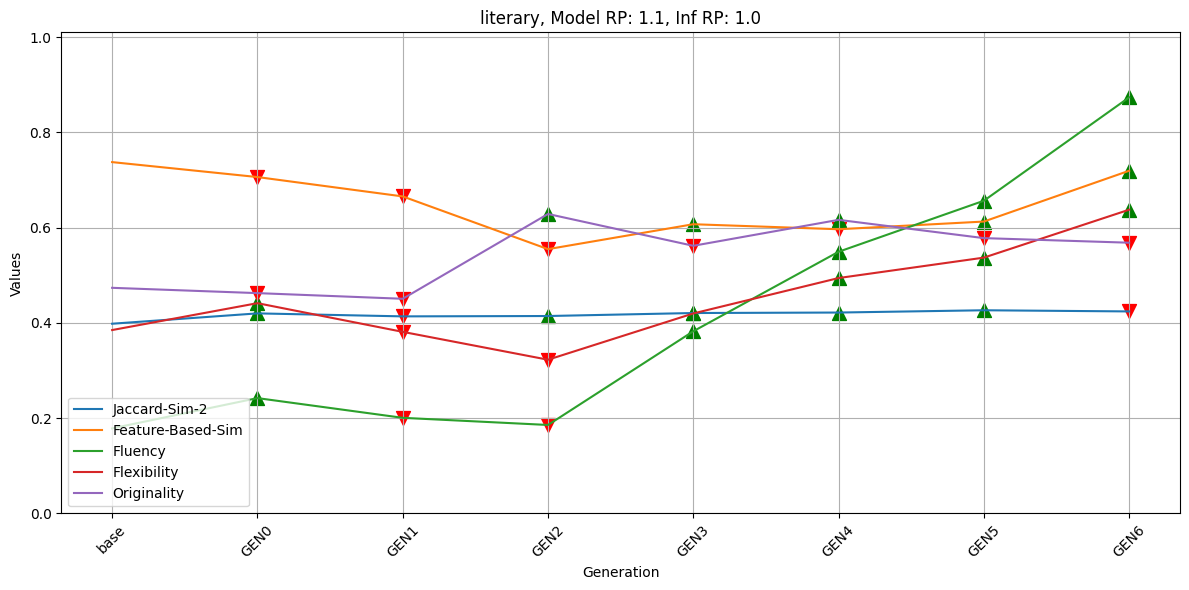

      Jaccard-Sim-2  Feature-Based-Sim   Fluency  Flexibility  Originality
base       0.416519           0.813849  0.653364     0.683364     0.571428
GEN0       0.459777           0.838054  0.985000     0.801176     0.555424
GEN1       0.443096           0.783590  0.828800     0.722900     0.558647
GEN2       0.431812           0.638572  0.608900     0.551400     0.622342
GEN3       0.431345           0.699828  0.789900     0.635800     0.602533
GEN4       0.425437           0.767992  0.915050     0.696634     0.604344
GEN5       0.425261           0.742857  0.958218     0.699109     0.574260
GEN6       0.423326           0.782969  1.031782     0.738416     0.553143


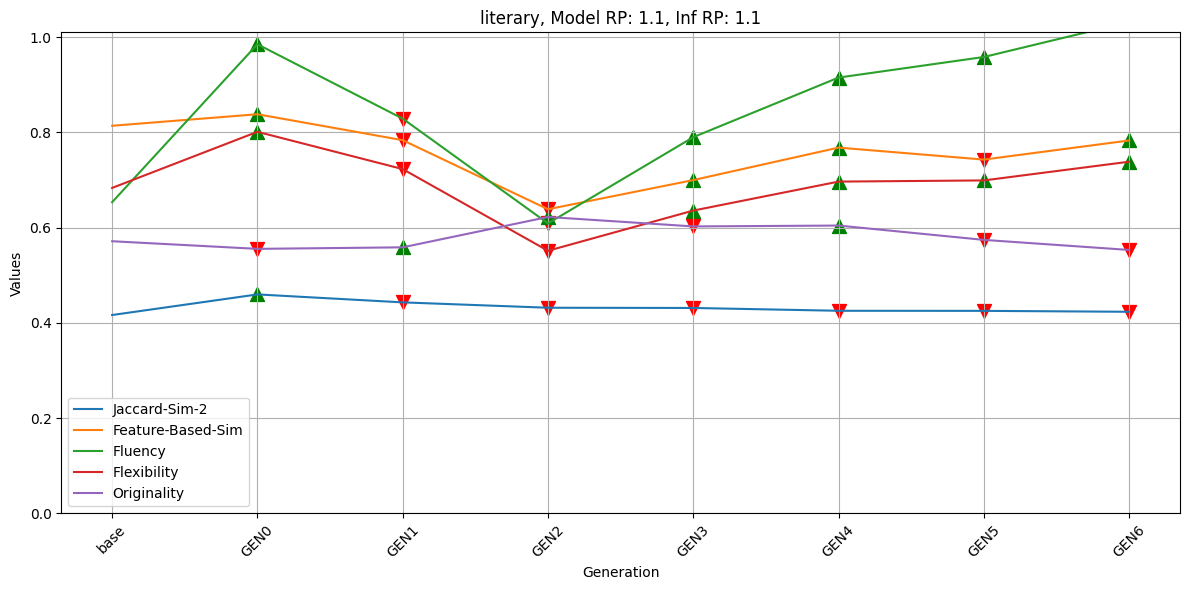

In [2]:
from tools.plotting_tools import process_and_plot_csv_data_with_legend_ltr

columns2 = ["Jaccard-Sim-2", "Feature-Based-Sim", "Fluency", "Flexibility", "Originality"]

ltr_eval_10_10 = [
    "outputs/opt125m/base/ltr_eval_table_base_rp1.0.csv",
    "outputs/opt125m/gen0/ltr_eval_table_gen0_rp1.0.csv",
    "outputs/opt125m/gen1_1.0/ltr_eval_table_gen1_rp1.0.csv",
    "outputs/opt125m/gen2_1.0/ltr_eval_table_gen2_rp1.0.csv",
    "outputs/opt125m/gen3_1.0/ltr_eval_table_gen3_rp1.0.csv",
    "outputs/opt125m/gen4_1.0/ltr_eval_table_gen4_rp1.0.csv",
    "outputs/opt125m/gen5_1.0/ltr_eval_table_gen5_rp1.0.csv",
    "outputs/opt125m/gen6_1.0/ltr_eval_table_gen6_rp1.0.csv",
    # "outputs/gen7/eval_table_gen7_2.csv"
]

ltr_eval_10_11 = [
    "outputs/opt125m/base/ltr_eval_table_base_rp1.1.csv",
    "outputs/opt125m/gen0/ltr_eval_table_gen0_rp1.1.csv",
    "outputs/opt125m/gen1_1.0/ltr_eval_table_gen1_rp1.1.csv",
    "outputs/opt125m/gen2_1.0/ltr_eval_table_gen2_rp1.1.csv",
    "outputs/opt125m/gen3_1.0/ltr_eval_table_gen3_rp1.1.csv",
    "outputs/opt125m/gen4_1.0/ltr_eval_table_gen4_rp1.1.csv",
    "outputs/opt125m/gen5_1.0/ltr_eval_table_gen5_rp1.1.csv",
    "outputs/opt125m/gen6_1.0/ltr_eval_table_gen6_rp1.1.csv",
    # "outputs/gen7/eval_table_gen7_2.csv"
]


ltr_eval_11_10 = [
    "outputs/opt125m/base/ltr_eval_table_base_rp1.0.csv",
    "outputs/opt125m/gen0/ltr_eval_table_gen0_rp1.0.csv",
    "outputs/opt125m/gen1_1.1/ltr_eval_table_gen1_rp1.0.csv",
    "outputs/opt125m/gen2_1.1/ltr_eval_table_gen2_rp1.0.csv",
    "outputs/opt125m/gen3_1.1/ltr_eval_table_gen3_rp1.0.csv",
    "outputs/opt125m/gen4_1.1/ltr_eval_table_gen4_rp1.0.csv",
    "outputs/opt125m/gen5_1.1/ltr_eval_table_gen5_rp1.0.csv",
    "outputs/opt125m/gen6_1.1/ltr_eval_table_gen6_rp1.0.csv",
    # "outputs/gen7/eval_table_gen7_2.csv"
]

ltr_eval_11_11 = [
    "outputs/opt125m/base/ltr_eval_table_base_rp1.1.csv",
    "outputs/opt125m/gen0/ltr_eval_table_gen0_rp1.1.csv",
    "outputs/opt125m/gen1_1.1/ltr_eval_table_gen1_rp1.1.csv",
    "outputs/opt125m/gen2_1.1/ltr_eval_table_gen2_rp1.1.csv",
    "outputs/opt125m/gen3_1.1/ltr_eval_table_gen3_rp1.1.csv",
    "outputs/opt125m/gen4_1.1/ltr_eval_table_gen4_rp1.1.csv",
    "outputs/opt125m/gen5_1.1/ltr_eval_table_gen5_rp1.1.csv",
    "outputs/opt125m/gen6_1.1/ltr_eval_table_gen6_rp1.1.csv",
    # "outputs/gen7/eval_table_gen7_2.csv"
]


#process_and_plot_csv_data_with_base(eval_files2, columns2, "creativity", "evaluation")
process_and_plot_csv_data_with_legend_ltr(ltr_eval_10_10, columns2, "literary", "evaluation", 1.0, 1.0)
process_and_plot_csv_data_with_legend_ltr(ltr_eval_10_11, columns2, "literary", "evaluation", 1.0, 1.1)
process_and_plot_csv_data_with_legend_ltr(ltr_eval_11_10, columns2, "literary", "evaluation", 1.1, 1.0)
process_and_plot_csv_data_with_legend_ltr(ltr_eval_11_11, columns2, "literary", "evaluation", 1.1, 1.1)

### Linguistic Evaluation Per Metric

      Inf_RP 1.0  Inf_RP 1.1
RD      0.857847    0.857847
Base    0.198648    0.543964
GEN0    0.214225    0.749251
GEN1    0.082420    0.140338
GEN2    0.090253    0.088386
GEN3    0.057071    0.077242
GEN4    0.056121    0.082842
GEN5    0.106241    0.105686
GEN6    0.138772    0.094837


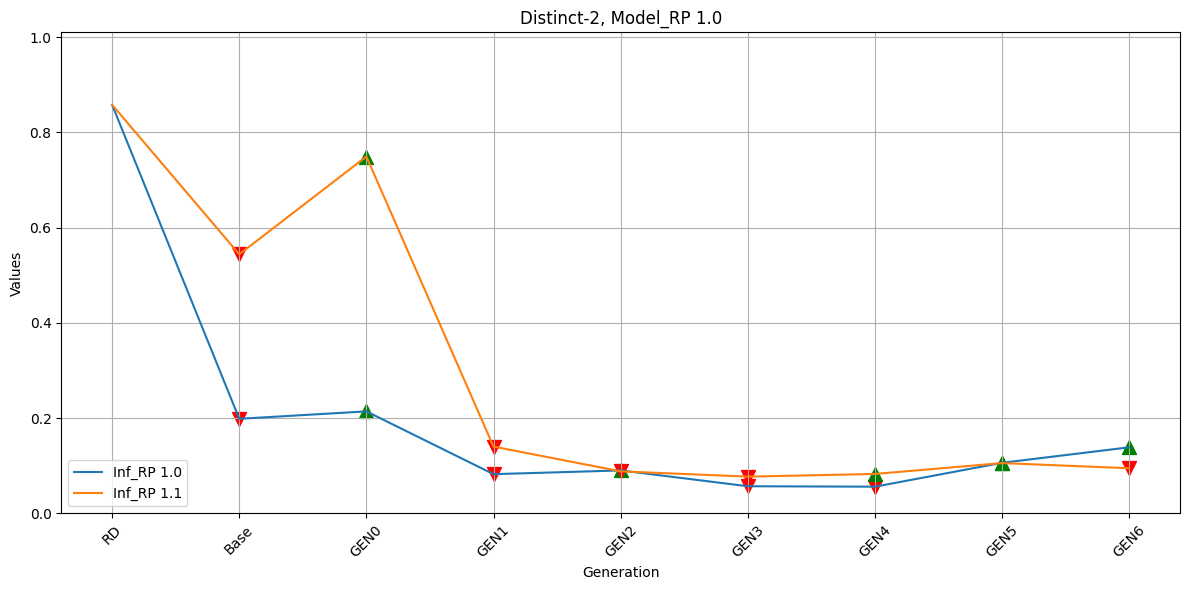

      Inf_RP 1.0  Inf_RP 1.1
RD      0.857847    0.857847
Base    0.198648    0.543964
GEN0    0.214225    0.749251
GEN1    0.177748    0.599506
GEN2    0.137715    0.436251
GEN3    0.312659    0.561302
GEN4    0.435798    0.677029
GEN5    0.519205    0.645212
GEN6    0.622986    0.721579


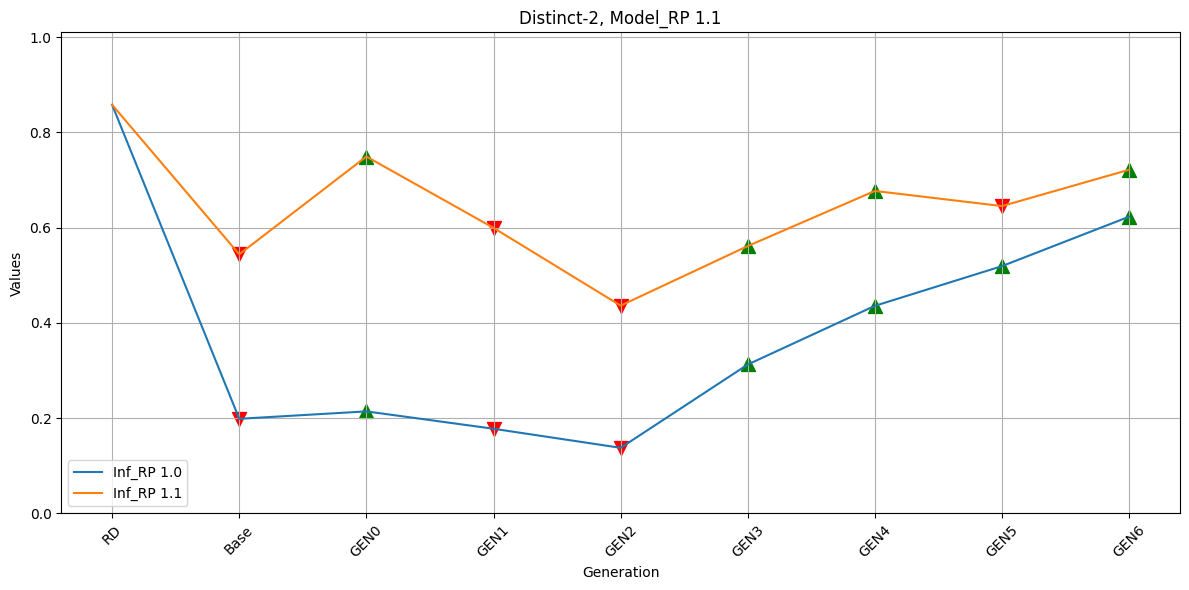

      Inf_RP 1.0  Inf_RP 1.1
RD      0.958945    0.958945
Base    0.221848    0.599569
GEN0    0.249755    0.830058
GEN1    0.077315    0.155797
GEN2    0.091960    0.093591
GEN3    0.057817    0.079492
GEN4    0.058743    0.084774
GEN5    0.107299    0.107420
GEN6    0.140523    0.097498


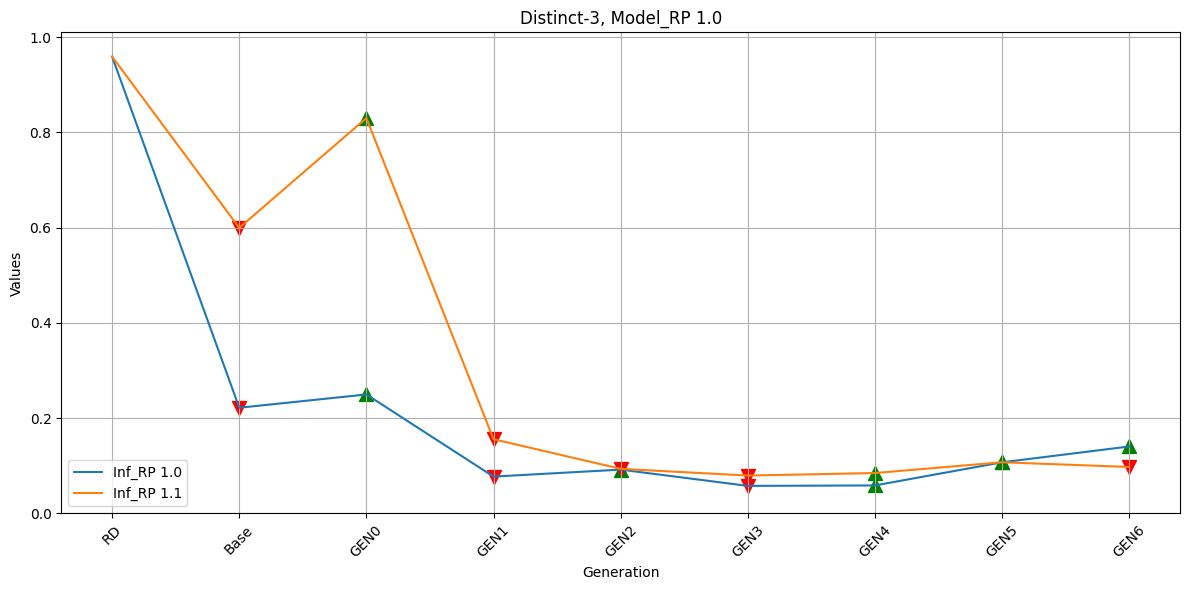

      Inf_RP 1.0  Inf_RP 1.1
RD      0.958945    0.958945
Base    0.221848    0.599569
GEN0    0.249755    0.830058
GEN1    0.194252    0.646478
GEN2    0.147506    0.459409
GEN3    0.328409    0.580043
GEN4    0.451001    0.687314
GEN5    0.535141    0.652340
GEN6    0.640098    0.730549


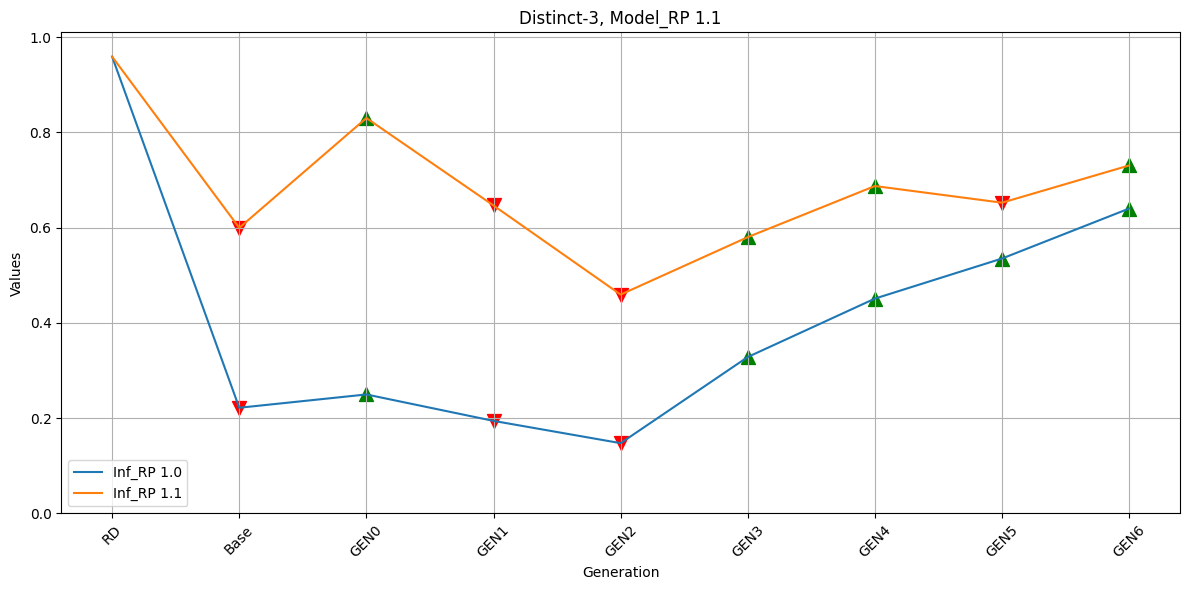

      Inf_RP 1.0  Inf_RP 1.1
RD      0.952630    0.952630
Base    0.247982    0.559459
GEN0    0.279120    0.787596
GEN1    0.204846    0.237058
GEN2    0.287177    0.253831
GEN3    0.446384    0.254396
GEN4    0.636110    0.463536
GEN5    0.535485    0.486710
GEN6    0.404635    0.532561


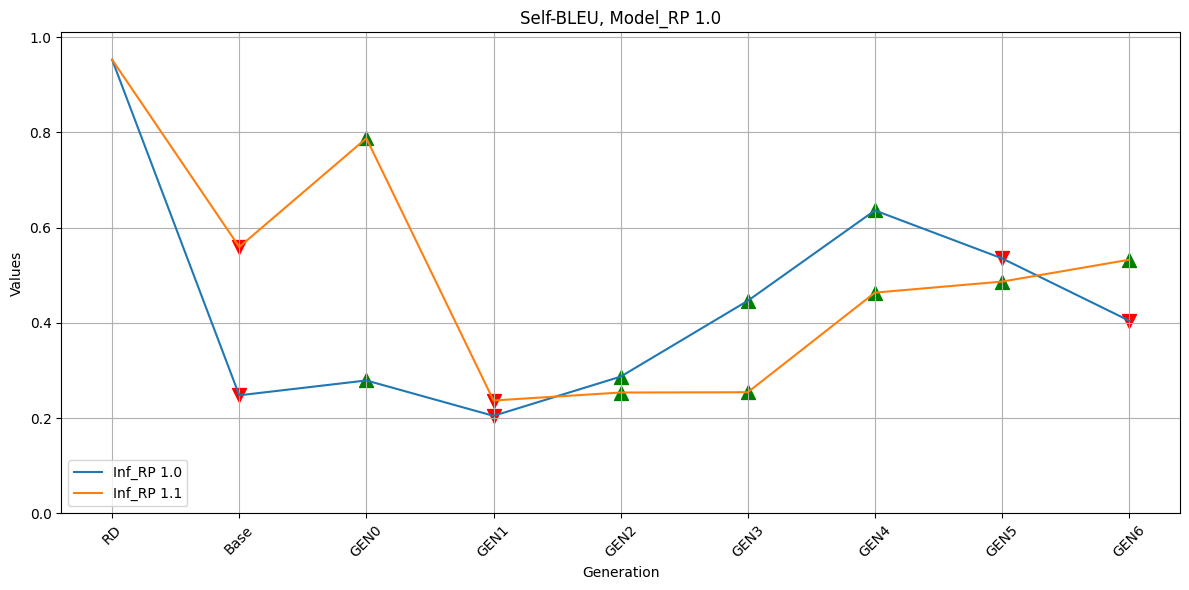

      Inf_RP 1.0  Inf_RP 1.1
RD      0.952630    0.952630
Base    0.247982    0.559459
GEN0    0.279120    0.787596
GEN1    0.241021    0.683170
GEN2    0.491377    0.697603
GEN3    0.596216    0.732751
GEN4    0.711176    0.754250
GEN5    0.802677    0.811438
GEN6    0.853481    0.864220


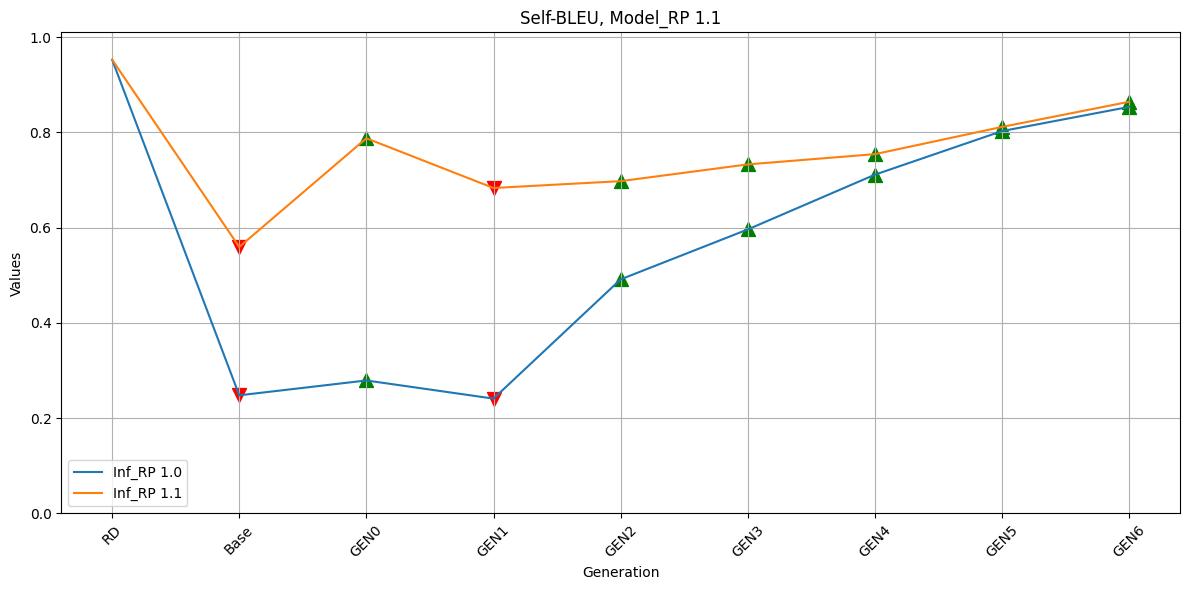

      Inf_RP 1.0  Inf_RP 1.1
RD      0.526975    0.526975
Base    0.155126    0.389368
GEN0    0.199715    0.489398
GEN1    0.154817    0.157955
GEN2    0.132601    0.129213
GEN3    0.276936    0.179930
GEN4    0.194446    0.144082
GEN5    0.173784    0.143879
GEN6    0.164240    0.144701


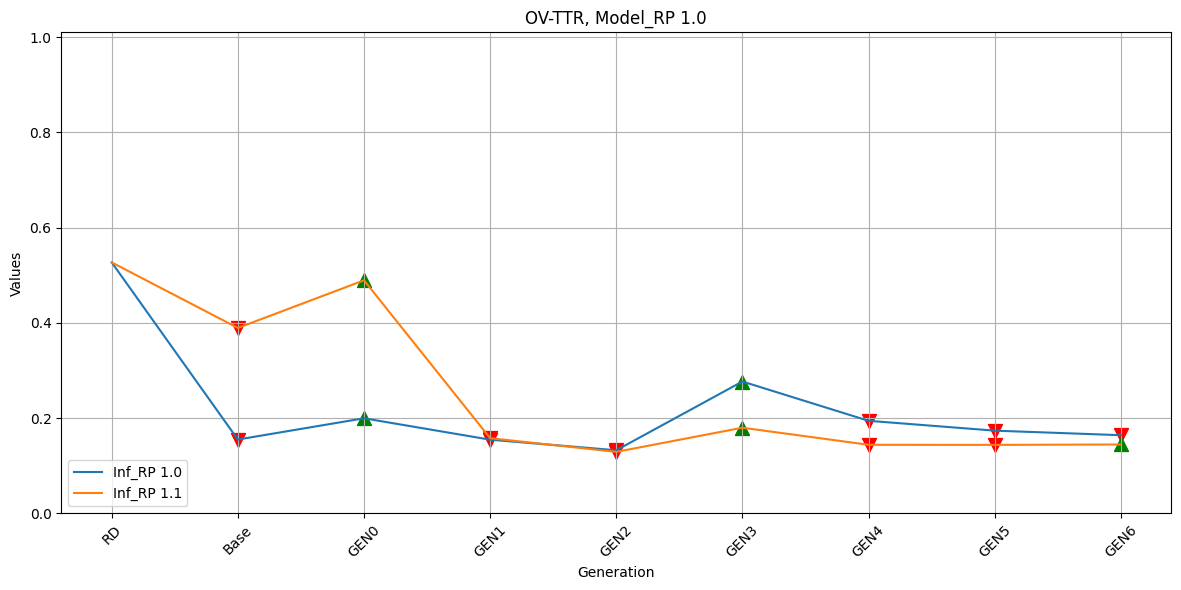

      Inf_RP 1.0  Inf_RP 1.1
RD      0.526975    0.526975
Base    0.155126    0.389368
GEN0    0.199715    0.489398
GEN1    0.190368    0.438999
GEN2    0.331172    0.494795
GEN3    0.415973    0.507444
GEN4    0.515500    0.532575
GEN5    0.579009    0.578138
GEN6    0.532383    0.621705


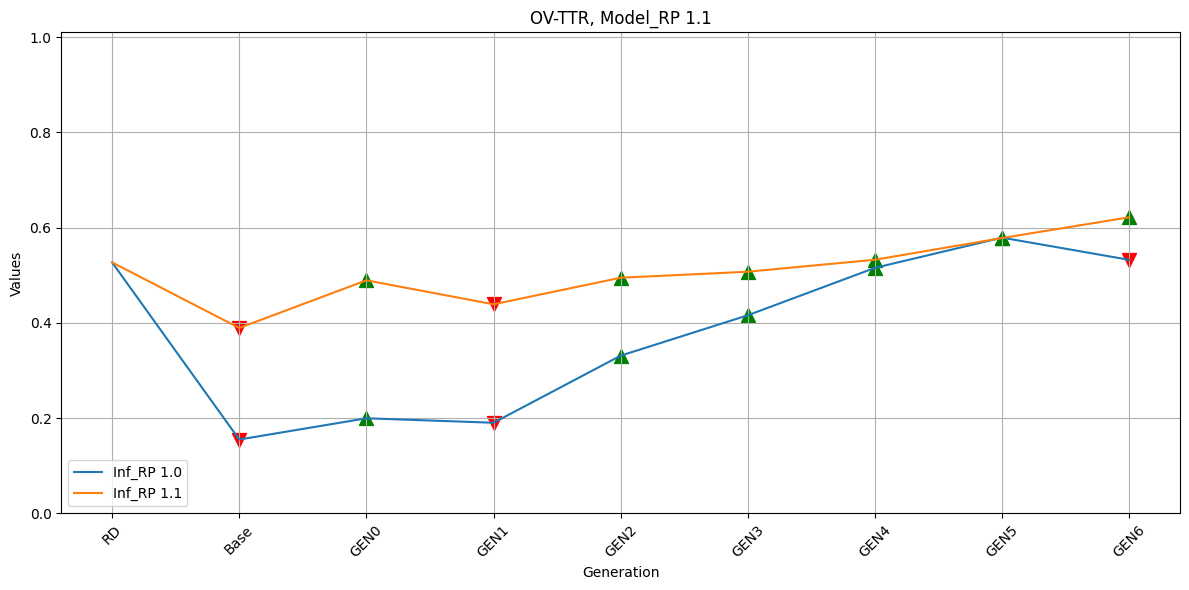

      Inf_RP 1.0  Inf_RP 1.1
RD      0.774601    0.774601
Base    0.410511    0.648793
GEN0    0.384645    0.699759
GEN1    0.339579    0.384337
GEN2    0.356066    0.358159
GEN3    0.454114    0.376002
GEN4    0.379936    0.326421
GEN5    0.392925    0.349896
GEN6    0.399642    0.401647


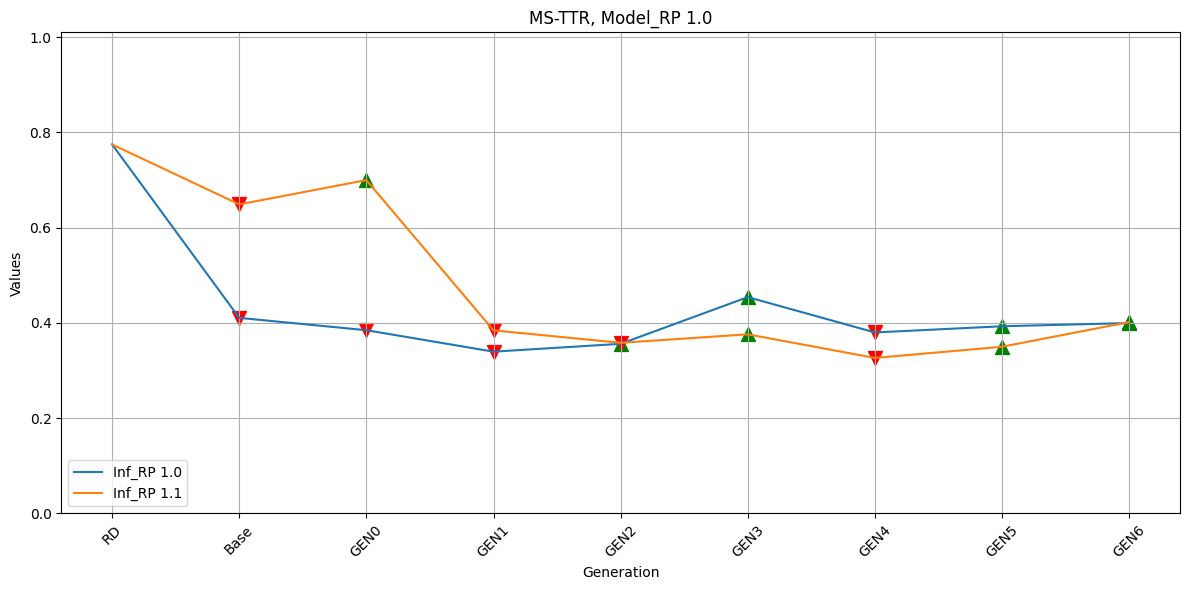

      Inf_RP 1.0  Inf_RP 1.1
RD      0.774601    0.774601
Base    0.410511    0.648793
GEN0    0.384645    0.699759
GEN1    0.389738    0.635503
GEN2    0.511299    0.651739
GEN3    0.579968    0.656970
GEN4    0.667026    0.712160
GEN5    0.697578    0.751562
GEN6    0.672054    0.767526


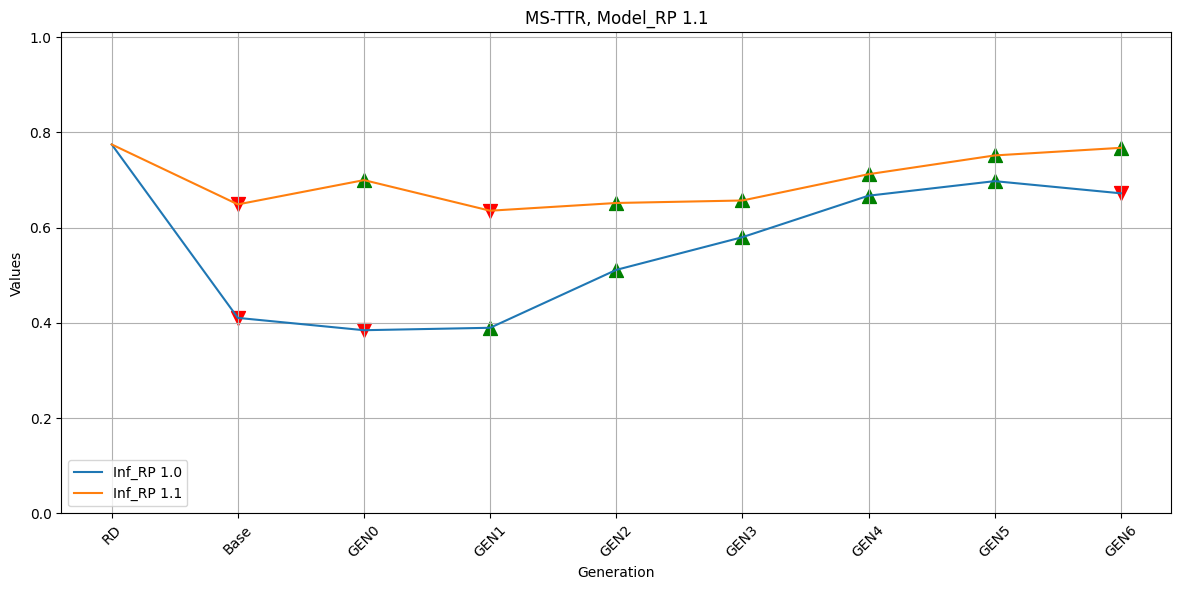

      Inf_RP 1.0  Inf_RP 1.1
RD      0.802330    0.802330
Base    0.307847    0.625971
GEN0    0.350182    0.726459
GEN1    0.145568    0.302339
GEN2    0.176245    0.209753
GEN3    0.165485    0.158140
GEN4    0.418668    0.367628
GEN5    0.390185    0.404990
GEN6    0.299001    0.407139


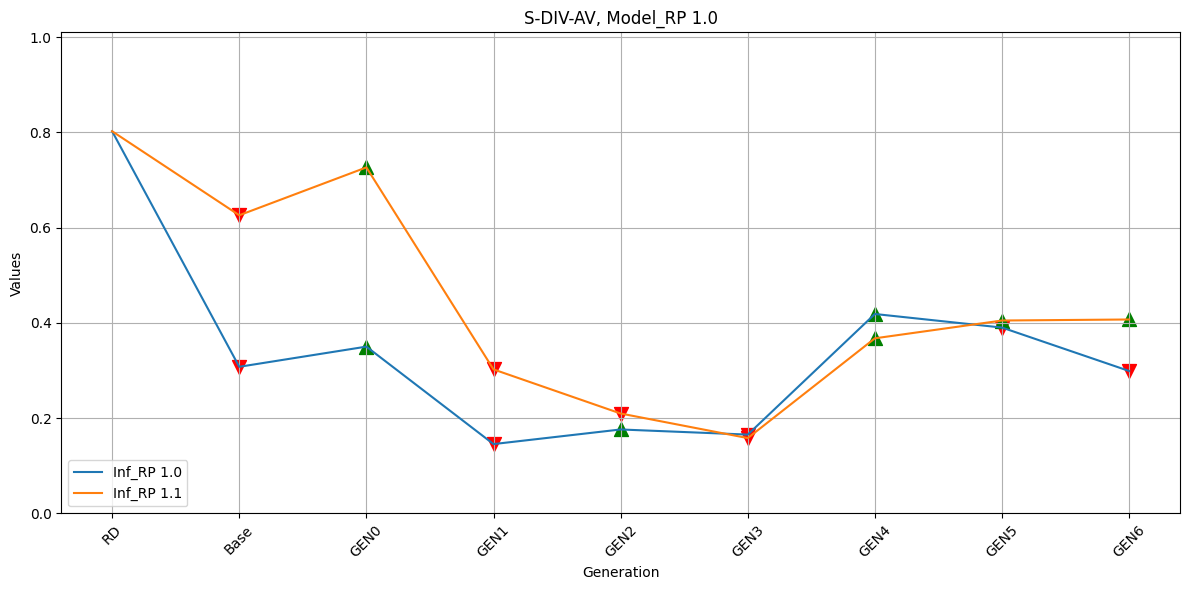

      Inf_RP 1.0  Inf_RP 1.1
RD      0.802330    0.802330
Base    0.307847    0.625971
GEN0    0.350182    0.726459
GEN1    0.302494    0.662195
GEN2    0.336263    0.610165
GEN3    0.487986    0.685045
GEN4    0.631402    0.742914
GEN5    0.724276    0.762659
GEN6    0.776638    0.804234


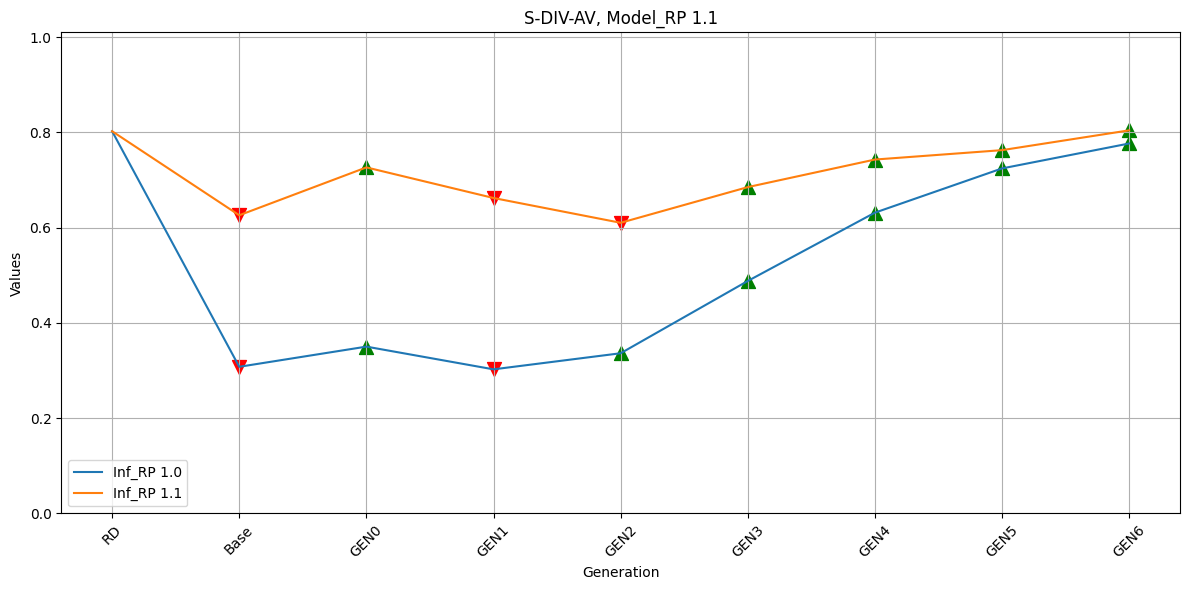

      Inf_RP 1.0  Inf_RP 1.1
RD      0.527642    0.527642
Base    0.151607    0.365771
GEN0    0.182166    0.471105
GEN1    0.061230    0.152870
GEN2    0.068537    0.094075
GEN3    0.051464    0.064968
GEN4    0.095551    0.110665
GEN5    0.112703    0.127751
GEN6    0.101416    0.121926


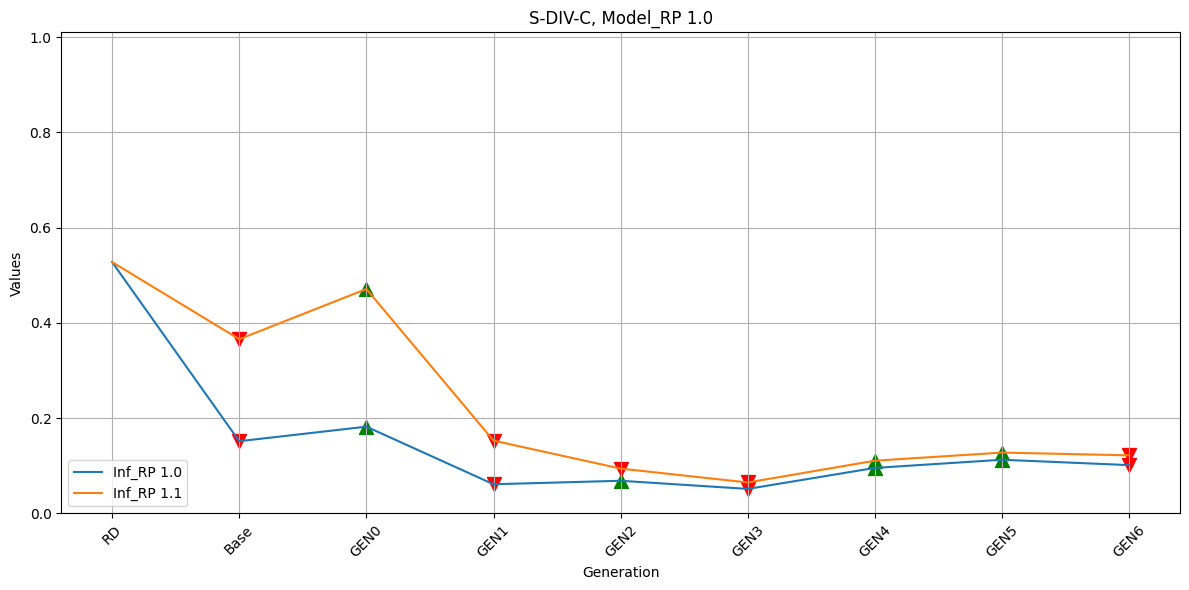

      Inf_RP 1.0  Inf_RP 1.1
RD      0.527642    0.527642
Base    0.151607    0.365771
GEN0    0.182166    0.471105
GEN1    0.152560    0.396208
GEN2    0.126321    0.298146
GEN3    0.197387    0.365230
GEN4    0.276893    0.426268
GEN5    0.328611    0.429039
GEN6    0.397822    0.457697


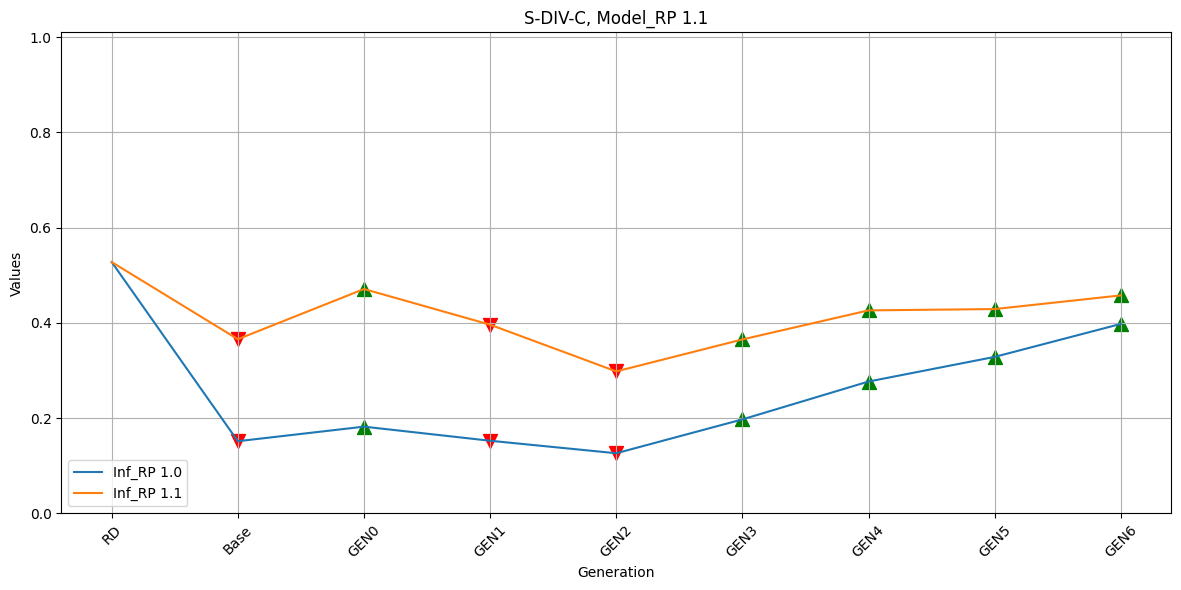

      Inf_RP 1.0  Inf_RP 1.1
RD      0.780589    0.780589
Base    0.294443    0.616454
GEN0    0.324921    0.700807
GEN1    0.121491    0.268519
GEN2    0.126372    0.169213
GEN3    0.100037    0.117980
GEN4    0.194490    0.234973
GEN5    0.237562    0.260546
GEN6    0.194686    0.244140


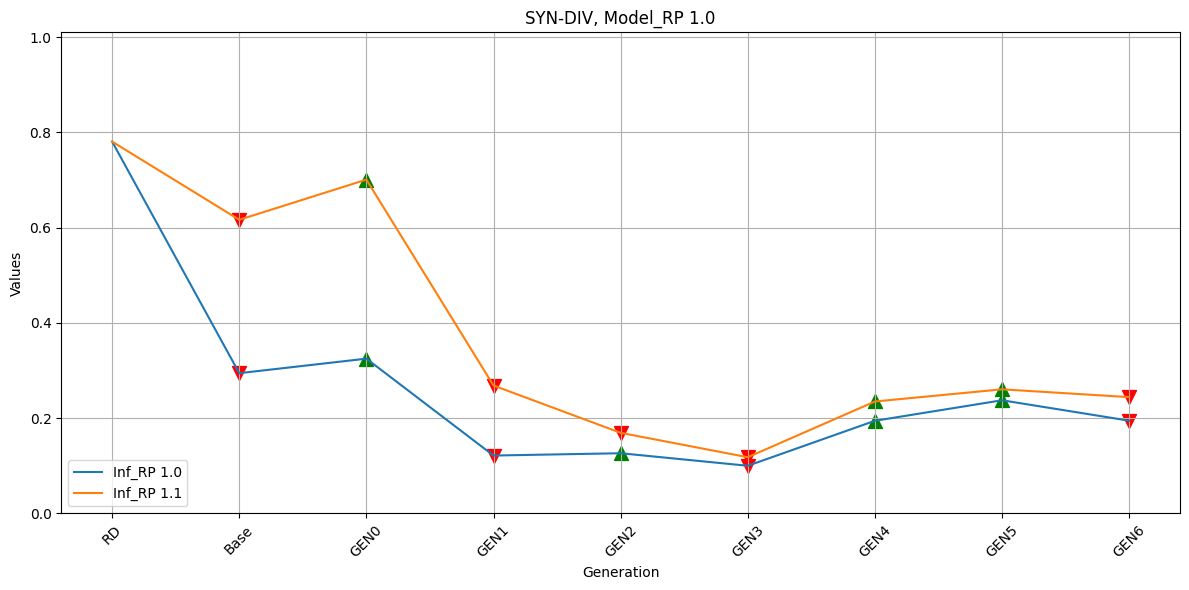

      Inf_RP 1.0  Inf_RP 1.1
RD      0.780589    0.780589
Base    0.294443    0.616454
GEN0    0.324921    0.700807
GEN1    0.258466    0.596173
GEN2    0.216983    0.461146
GEN3    0.319949    0.544518
GEN4    0.436717    0.636325
GEN5    0.507472    0.641095
GEN6    0.594918    0.684346


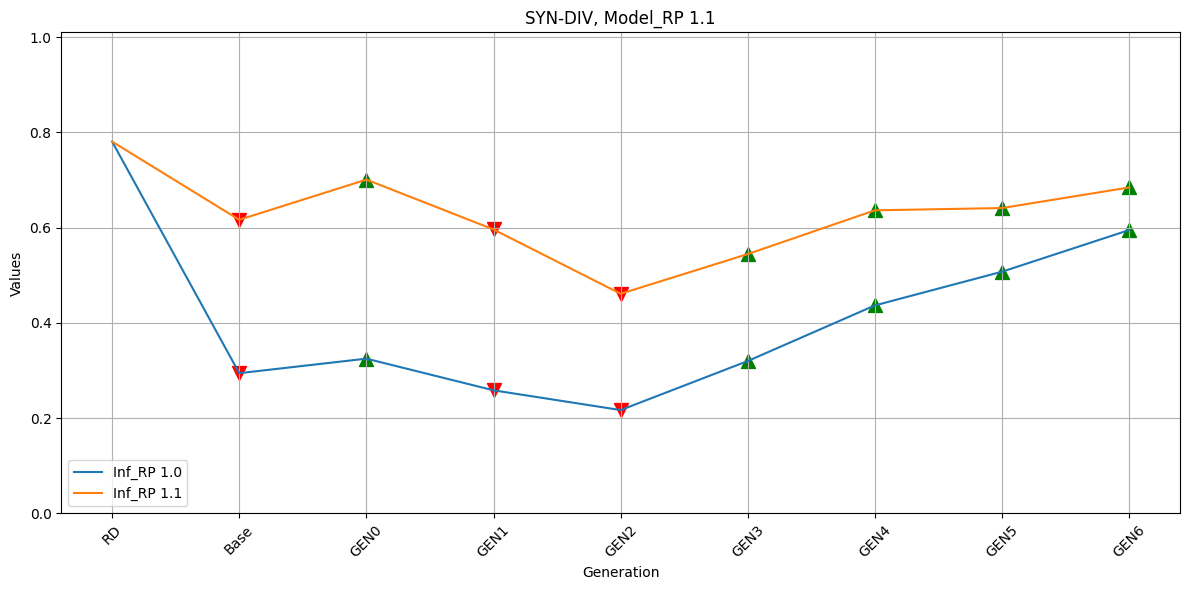

In [3]:

import csv
import pandas as pd
import matplotlib.pyplot as plt
import os


linguistic_evaluation_scores_10 = [
    ling_eval_10_10,
    ling_eval_10_11,
]

linguistic_evaluation_scores_11 = [ 
    ling_eval_11_10,
    ling_eval_11_11
]



def process_and_plot_csv_per_metric_ling(score_lineages, column, eval_name, output_dir):
    # Initialize a DataFrame to store the data
    output_data = pd.DataFrame()
    #print(data)
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    def return_variable_name(var):
        variable_name = [name for name, value in globals().items() if value is var][0]
        return variable_name

    # Read the last line of each file and append to the DataFrame
    for lineage in score_lineages:
        lineage_rps = '_'.join(return_variable_name(lineage).split('_')[2:])
        model_rp = "Model_RP " + str(float(lineage_rps.split("_")[0]) /10)
        inference_rp = "Inf_RP " + str(float(lineage_rps.split("_")[1]) /10)

        for i, file_path in enumerate(lineage):
            value = pd.read_csv(file_path).loc[:, column].iloc[-1]
            
            if i == 0:
                # Set the first file's last line as "RD"
                output_data.loc["RD", inference_rp] = value
            elif i == 1:
                # Set the first file's last line as "Base"
                output_data.loc["Base", inference_rp] = value
            else:
                row_name = f"GEN{i-2}"
                output_data.loc[row_name, inference_rp] = value

    # Save the DataFrame to a CSV file in the output directory
    output_csv_path = os.path.join(output_dir, f'{column}_{model_rp}.csv')
    output_data.to_csv(output_csv_path, index=True)
    print(output_data)

    # Plot each column and save to the specified output directory
    plt.figure(figsize=(12,6))
    for column in output_data.columns:
        plt.plot(output_data.index, output_data[column], marker='', label=column)
        for i in range(len(output_data) - 1):
            start_point = output_data.index[i]
            end_point = output_data.index[i + 1]
            start_value = output_data.loc[start_point, column]
            end_value = output_data.loc[end_point, column]

            # Add triangles
            if end_value > start_value:
                plt.scatter(end_point, end_value, marker='^', color='green', s=100)
            else:
                plt.scatter(end_point, end_value, marker='v', color='red', s=100)
        
    plt.title(f'{eval_name}, {model_rp}')
    plt.xlabel('Generation')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(loc='lower left')
    plt.ylim(0,1.01)

    output_image_path = os.path.join(output_dir, f'{eval_name}_{model_rp}.jpeg')
    plt.savefig(output_image_path)
    plt.show()


# Distinct-2
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_10, "Distinct-2", "Distinct-2", "evaluation/linguistic/distinct_2")
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_11, "Distinct-2", "Distinct-2", "evaluation/linguistic/distinct_2")

# Dinstinct-3
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_10, "Distinct-3", "Distinct-3", "evaluation/linguistic/distinct_2")
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_11, "Distinct-3", "Distinct-3", "evaluation/linguistic/distinct_2")

# self-Bleu
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_10, "Self-BLEU", "Self-BLEU", "evaluation/linguistic/self_bleu")
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_11, "Self-BLEU", "Self-BLEU", "evaluation/linguistic/self_bleu")

# OV-TTR
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_10, "OV-TTR", "OV-TTR", "evaluation/linguistic/ov_ttr")
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_11, "OV-TTR", "OV-TTR", "evaluation/linguistic/ov_ttr")

# MS-TTR
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_10, "MS-TTR", "MS-TTR", "evaluation/linguistic/ms_ttr")
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_11, "MS-TTR", "MS-TTR", "evaluation/linguistic/ms_ttr")

# S-DIV-AV
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_10, "S-DIV-AV", "S-DIV-AV", "evaluation/linguistic/s_div_av")
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_11, "S-DIV-AV", "S-DIV-AV", "evaluation/linguistic/s_div_av")

# S-DIV-C
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_10, "S-DIV-C", "S-DIV-C", "evaluation/linguistic/s_div_c")
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_11, "S-DIV-C", "S-DIV-C", "evaluation/linguistic/s_div_c")

# SYN-DIV
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_10, "SYN-DIV", "SYN-DIV", "evaluation/linguistic/syn_div")
process_and_plot_csv_per_metric_ling(linguistic_evaluation_scores_11, "SYN-DIV", "SYN-DIV", "evaluation/linguistic/syn_div")


### Literary Evaluation per Metric

      Inf_RP 1.0  Inf_RP 1.1
Base    0.398241    0.416519
GEN0    0.419967    0.459777
GEN1    0.399706    0.413175
GEN2    0.392707    0.397464
GEN3    0.395815    0.397801
GEN4    0.394391    0.397716
GEN5    0.392165    0.396047
GEN6    0.388316    0.388504


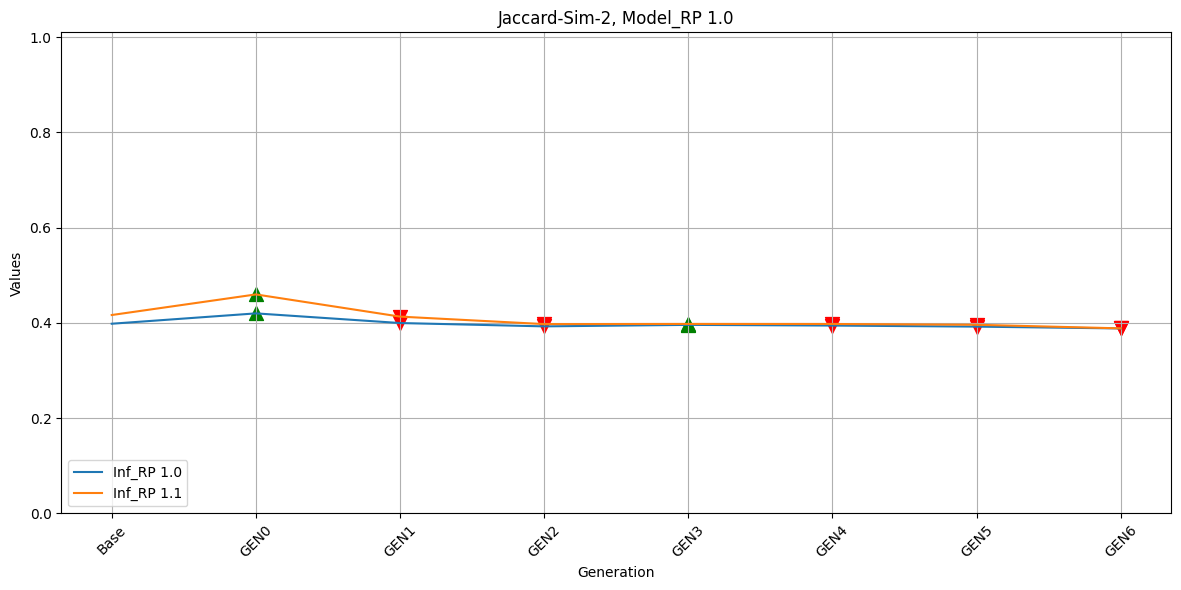

      Inf_RP 1.0  Inf_RP 1.1
Base    0.398241    0.416519
GEN0    0.419967    0.459777
GEN1    0.413686    0.443096
GEN2    0.414429    0.431812
GEN3    0.420723    0.431345
GEN4    0.421730    0.425437
GEN5    0.426511    0.425261
GEN6    0.424073    0.423326


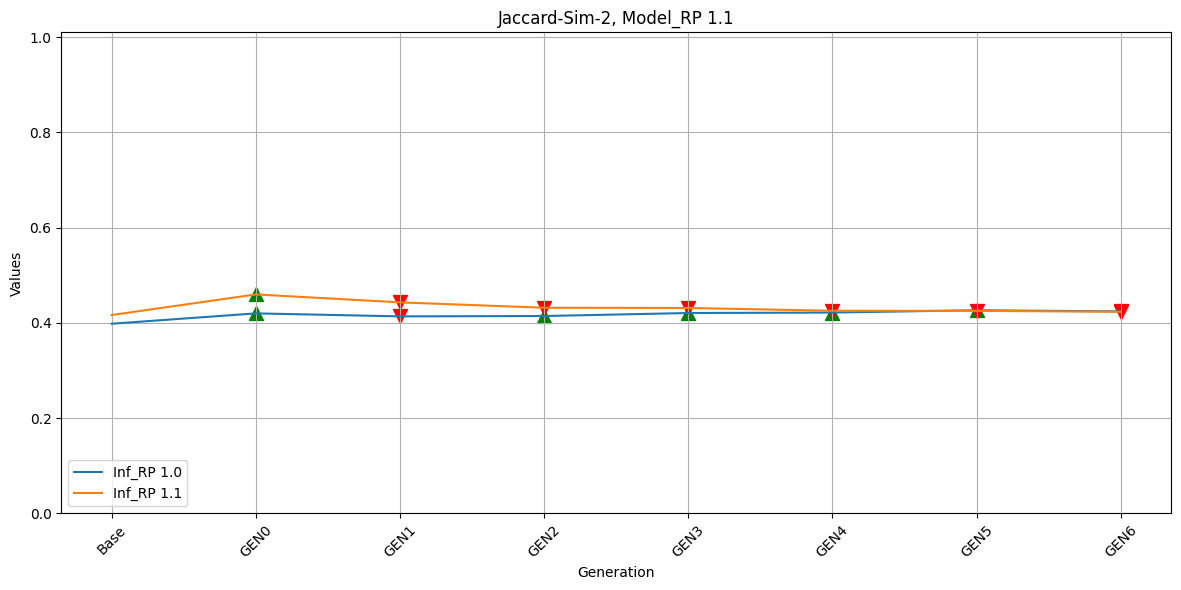

      Inf_RP 1.0  Inf_RP 1.1
Base    0.737555    0.813849
GEN0    0.706172    0.838054
GEN1    0.636233    0.675369
GEN2    0.651413    0.684883
GEN3    0.558555    0.677970
GEN4    0.515073    0.546865
GEN5    0.540852    0.561107
GEN6    0.636762    0.628589


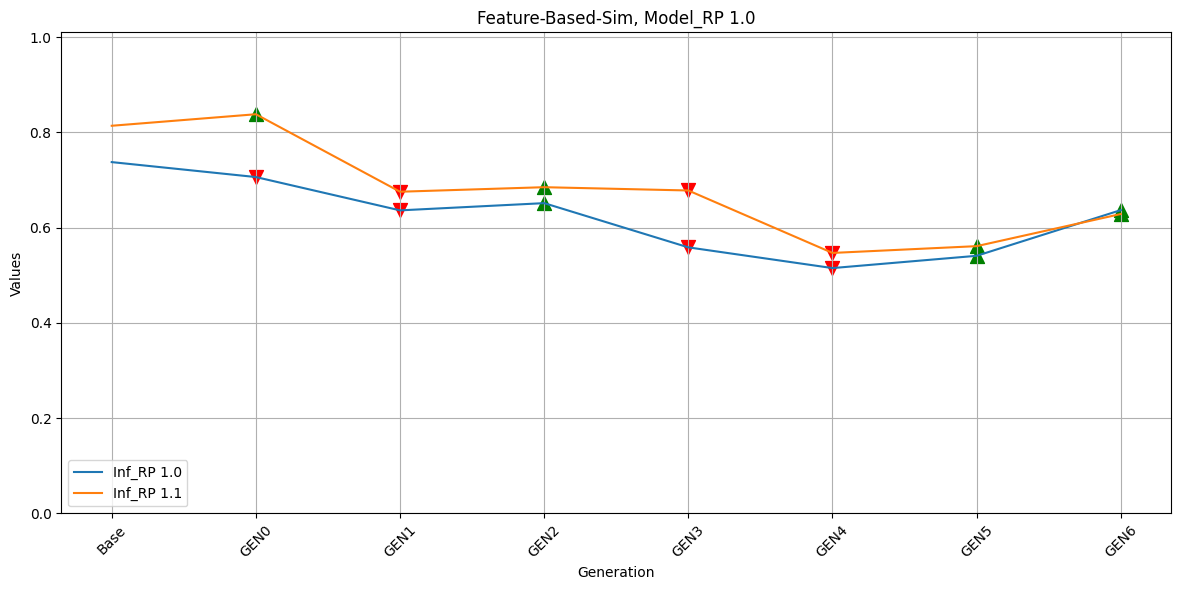

      Inf_RP 1.0  Inf_RP 1.1
Base    0.737555    0.813849
GEN0    0.706172    0.838054
GEN1    0.665521    0.783590
GEN2    0.554824    0.638572
GEN3    0.607134    0.699828
GEN4    0.596614    0.767992
GEN5    0.612758    0.742857
GEN6    0.719407    0.782969


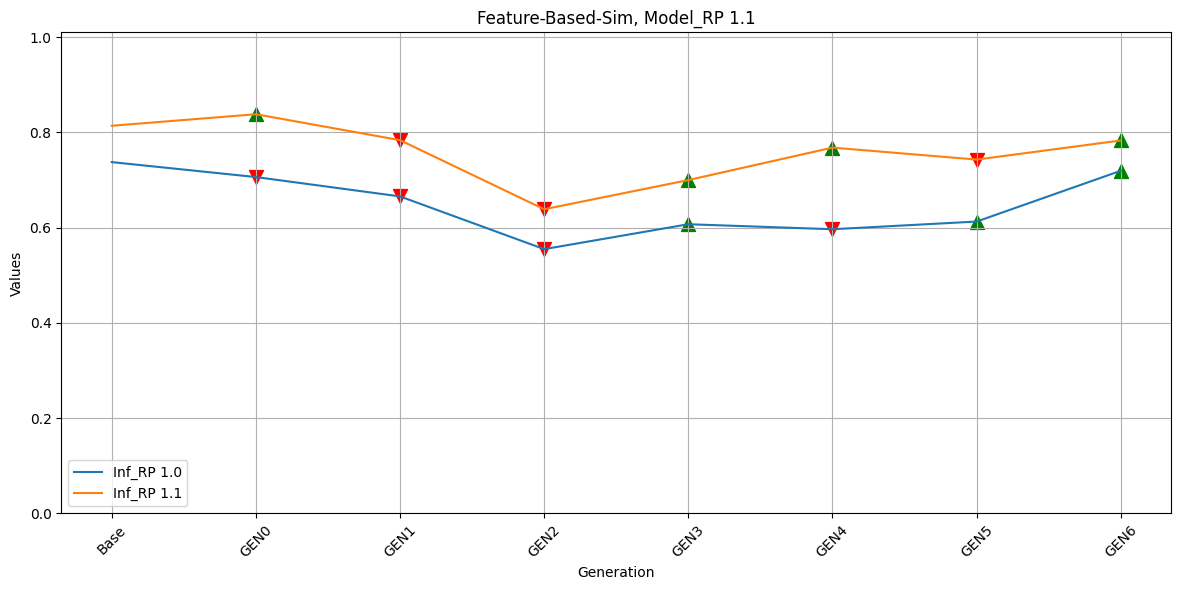

      Inf_RP 1.0  Inf_RP 1.1
Base    0.178515    0.653364
GEN0    0.242100    0.985000
GEN1    0.095248    0.212376
GEN2    0.088119    0.114700
GEN3    0.065000    0.077600
GEN4    0.074554    0.072376
GEN5    0.083564    0.094059
GEN6    0.098515    0.109703


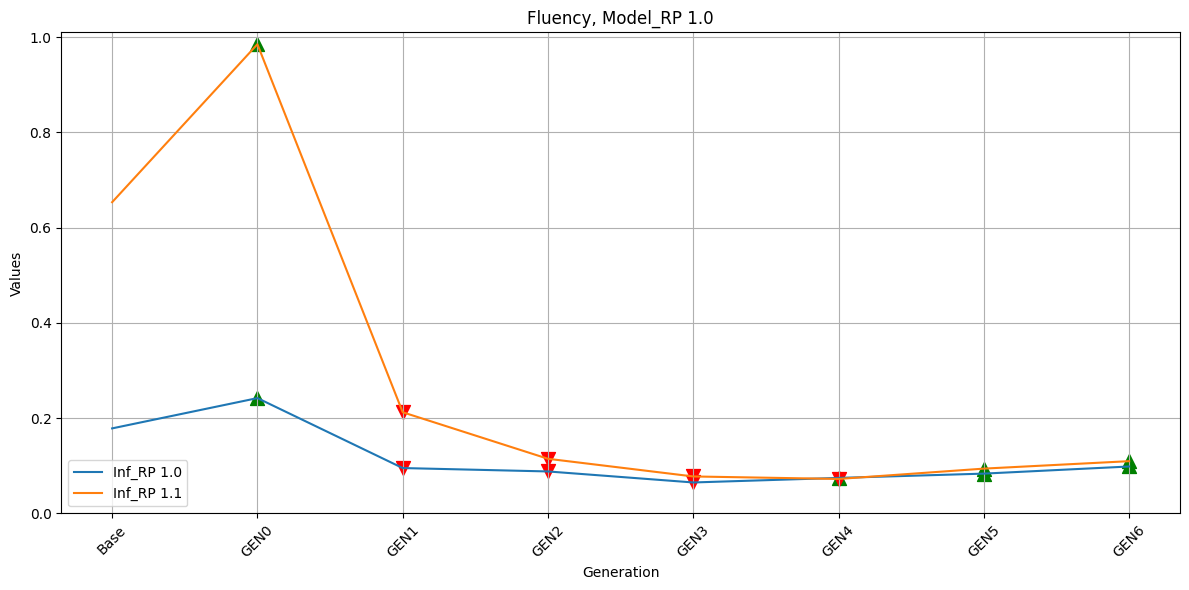

      Inf_RP 1.0  Inf_RP 1.1
Base    0.178515    0.653364
GEN0    0.242100    0.985000
GEN1    0.200700    0.828800
GEN2    0.185700    0.608900
GEN3    0.382400    0.789900
GEN4    0.549307    0.915050
GEN5    0.656436    0.958218
GEN6    0.873465    1.031782


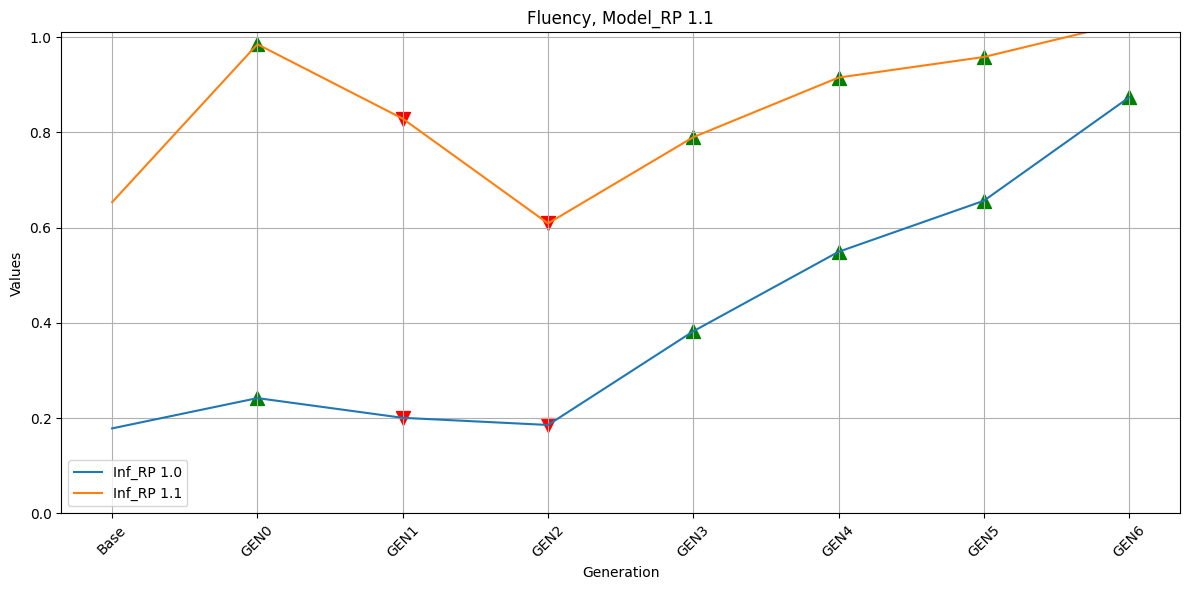

      Inf_RP 1.0  Inf_RP 1.1
Base    0.384950    0.683364
GEN0    0.441400    0.801176
GEN1    0.259604    0.425545
GEN2    0.257030    0.297000
GEN3    0.170600    0.218500
GEN4    0.170693    0.176634
GEN5    0.197921    0.226238
GEN6    0.248020    0.252970


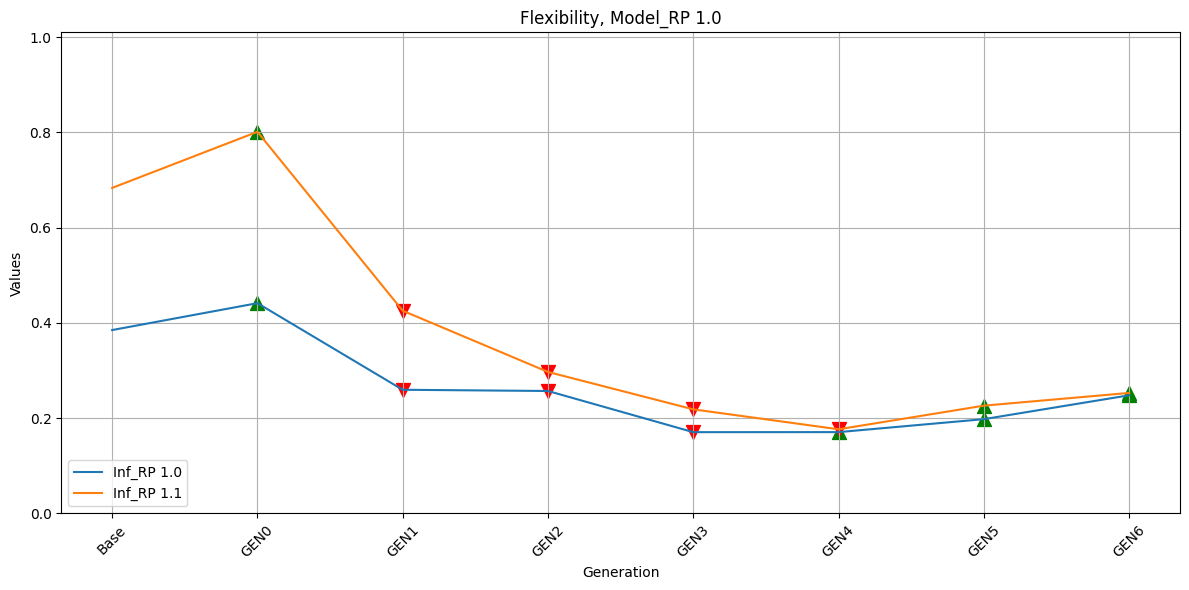

      Inf_RP 1.0  Inf_RP 1.1
Base    0.384950    0.683364
GEN0    0.441400    0.801176
GEN1    0.381200    0.722900
GEN2    0.322700    0.551400
GEN3    0.419800    0.635800
GEN4    0.494158    0.696634
GEN5    0.537030    0.699109
GEN6    0.637624    0.738416


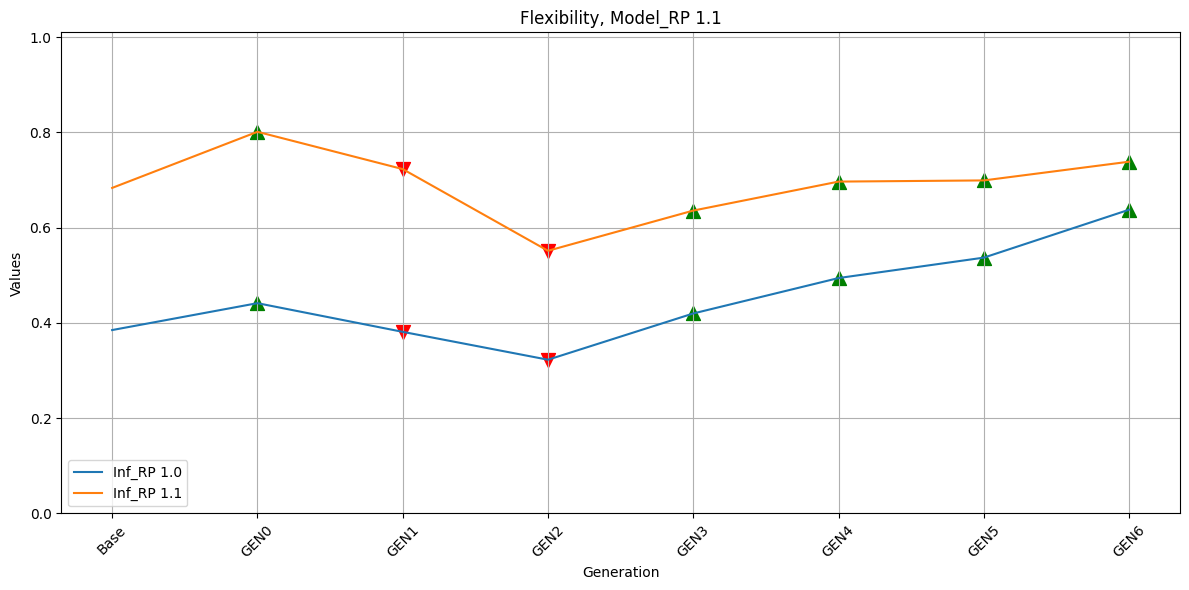

      Inf_RP 1.0  Inf_RP 1.1
Base    0.473637    0.571428
GEN0    0.462506    0.555424
GEN1    0.508765    0.473462
GEN2    0.494738    0.486717
GEN3    0.526348    0.453898
GEN4    0.643707    0.628348
GEN5    0.652778    0.630921
GEN6    0.582654    0.548552


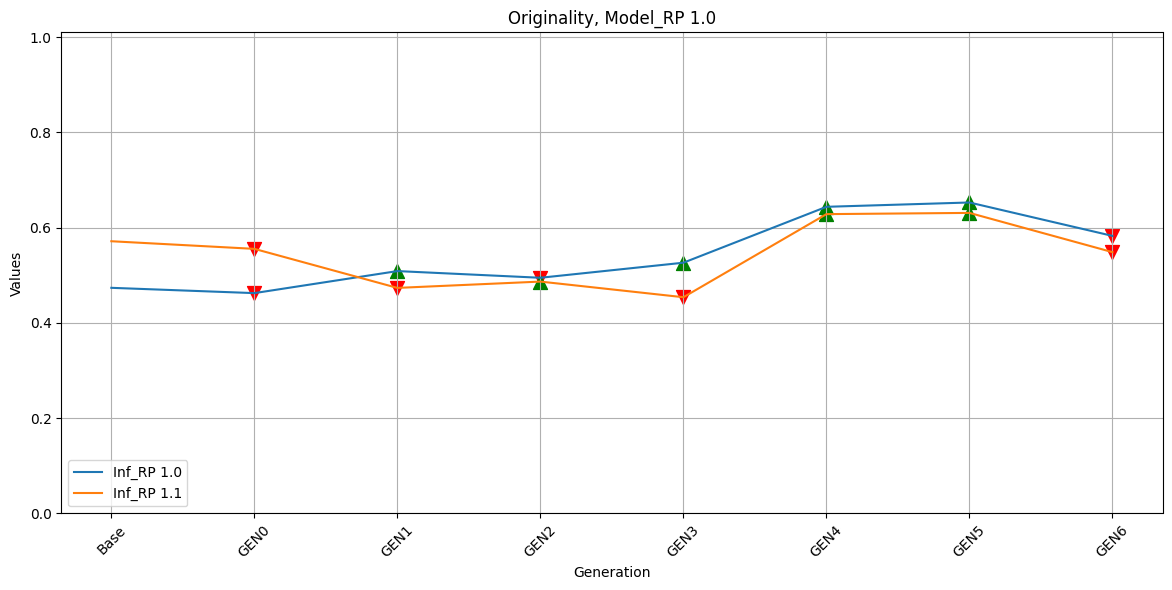

      Inf_RP 1.0  Inf_RP 1.1
Base    0.473637    0.571428
GEN0    0.462506    0.555424
GEN1    0.450625    0.558647
GEN2    0.628661    0.622342
GEN3    0.561856    0.602533
GEN4    0.616331    0.604344
GEN5    0.577965    0.574260
GEN6    0.568332    0.553143


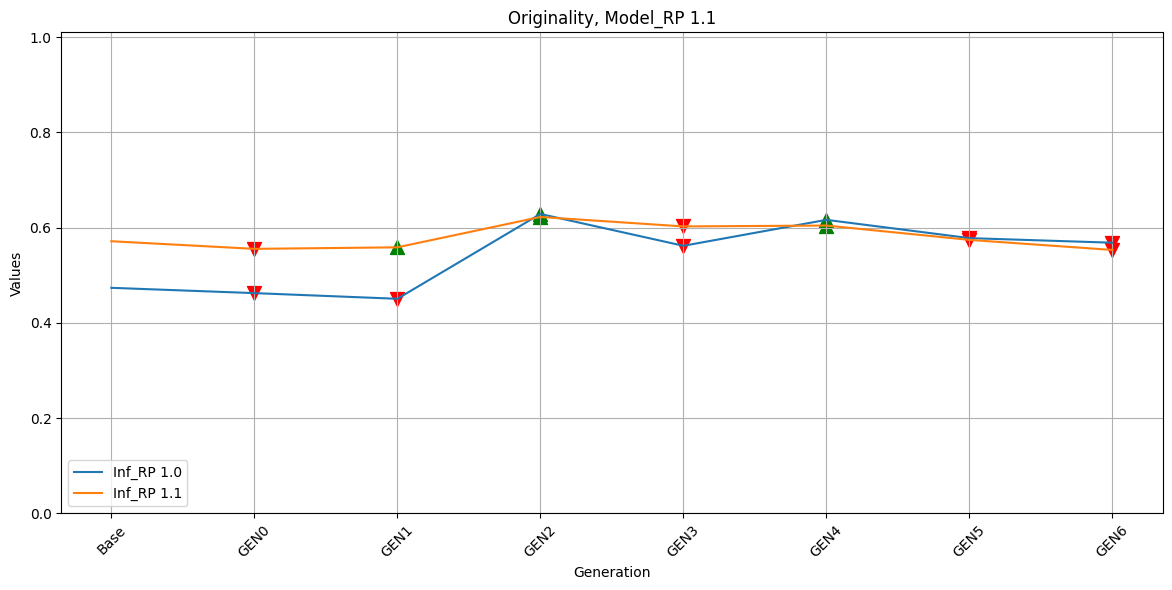

In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import os


literary_evaluation_scores_10 = [
    ltr_eval_10_10,
    ltr_eval_10_11,
]

literary_evaluation_scores_11 = [ 
    ltr_eval_11_10,
    ltr_eval_11_11
]



def process_and_plot_csv_per_metric_ltr(score_lineages, column, eval_name, output_dir):
    # Initialize a DataFrame to store the data
    output_data = pd.DataFrame()
    #print(data)
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    def return_variable_name(var):
        variable_name = [name for name, value in globals().items() if value is var][0]
        return variable_name

    # Read the last line of each file and append to the DataFrame
    for lineage in score_lineages:
        lineage_rps = '_'.join(return_variable_name(lineage).split('_')[2:])
        model_rp = "Model_RP " + str(float(lineage_rps.split("_")[0]) /10)
        inference_rp = "Inf_RP " + str(float(lineage_rps.split("_")[1]) /10)

        for i, file_path in enumerate(lineage):
            value = pd.read_csv(file_path).loc[:, column].iloc[-1]
            
            # if i == 0:
            #     # Set the first file's last line as "RD"
            #     output_data.loc["RD", inference_rp] = value
            if i == 0:
                # Set the first file's last line as "Base"
                output_data.loc["Base", inference_rp] = value
            else:
                row_name = f"GEN{i-1}"
                output_data.loc[row_name, inference_rp] = value

    # Save the DataFrame to a CSV file in the output directory
    output_csv_path = os.path.join(output_dir, f'{column}_{model_rp}.csv')
    output_data.to_csv(output_csv_path, index=True)
    print(output_data)

    # Plot each column and save to the specified output directory
    plt.figure(figsize=(12,6))
    for column in output_data.columns:
        plt.plot(output_data.index, output_data[column], marker='', label=column)
        for i in range(len(output_data) - 1):
            start_point = output_data.index[i]
            end_point = output_data.index[i + 1]
            start_value = output_data.loc[start_point, column]
            end_value = output_data.loc[end_point, column]

            # Add triangles
            if end_value > start_value:
                plt.scatter(end_point, end_value, marker='^', color='green', s=100)
            else:
                plt.scatter(end_point, end_value, marker='v', color='red', s=100)
        
    plt.title(f'{eval_name}, {model_rp}')
    plt.xlabel('Generation')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(loc='lower left')
    plt.ylim(0,1.01)

    output_image_path = os.path.join(output_dir, f'{eval_name}_{model_rp}.jpeg')
    plt.savefig(output_image_path)
    plt.show()


# Jaccard-Sim-2
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_10, "Jaccard-Sim-2", "Jaccard-Sim-2", "evaluation/literary/jaccard_sim_2")
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_11, "Jaccard-Sim-2", "Jaccard-Sim-2", "evaluation/literary/jaccard_sim_2")

# Dinstinct-3
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_10, "Feature-Based-Sim", "Feature-Based-Sim", "evaluation/literary/feat_based_sim")
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_11, "Feature-Based-Sim", "Feature-Based-Sim", "evaluation/literary/feat_based_sim")

# Fluency
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_10, "Fluency", "Fluency", "evaluation/literary/fluency")
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_11, "Fluency", "Fluency", "evaluation/literary/fluency")

# Flexibility
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_10, "Flexibility", "Flexibility", "evaluation/literary/flexibility")
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_11, "Flexibility", "Flexibility", "evaluation/literary/flexibility")

# Originality
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_10, "Originality", "Originality", "evaluation/literary/originality")
process_and_plot_csv_per_metric_ltr(literary_evaluation_scores_11, "Originality", "Originality", "evaluation/literary/originality")
